![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/04.2.Clinical_Deidentification_SparkNLP_vs_SpaCy_vs_Scrubadub_vs_Presidio_Comparison.ipynb)

# Comparison of ScrubaDub + Spacy and Presidio + Spacy vs Spark NLP deidentification capabilities
Out-of-the-box, without customization


image.png


In this notebook we will include a comparison of the deidentification capabilities of different libraries on 100 random clinical notes taken from [n2C2 Deidentification](https://portal.dbmi.hms.harvard.edu/projects/n2c2-nlp/) dataset.

We are just taking into account all the capabilities the libraries offer **without needing to do any further training, finetuning or defining in-house rules.**

The tested libraries are:
- Spark NLP for Healthcare ([clinical_deidentification](https://https://nlp.johnsnowlabs.com/2021/06/08/clinical_deidentification_glove_en.html) pipeline with Glove Embeddings)
- [Scrubadub with Spacy Transformers](https://github.com/LeapBeyond/scrubadub_spacy)

- [Presidio with Spacy Transformers](https://github.com/microsoft/presidio)

# RESULTS FOR EACH LIBRARY

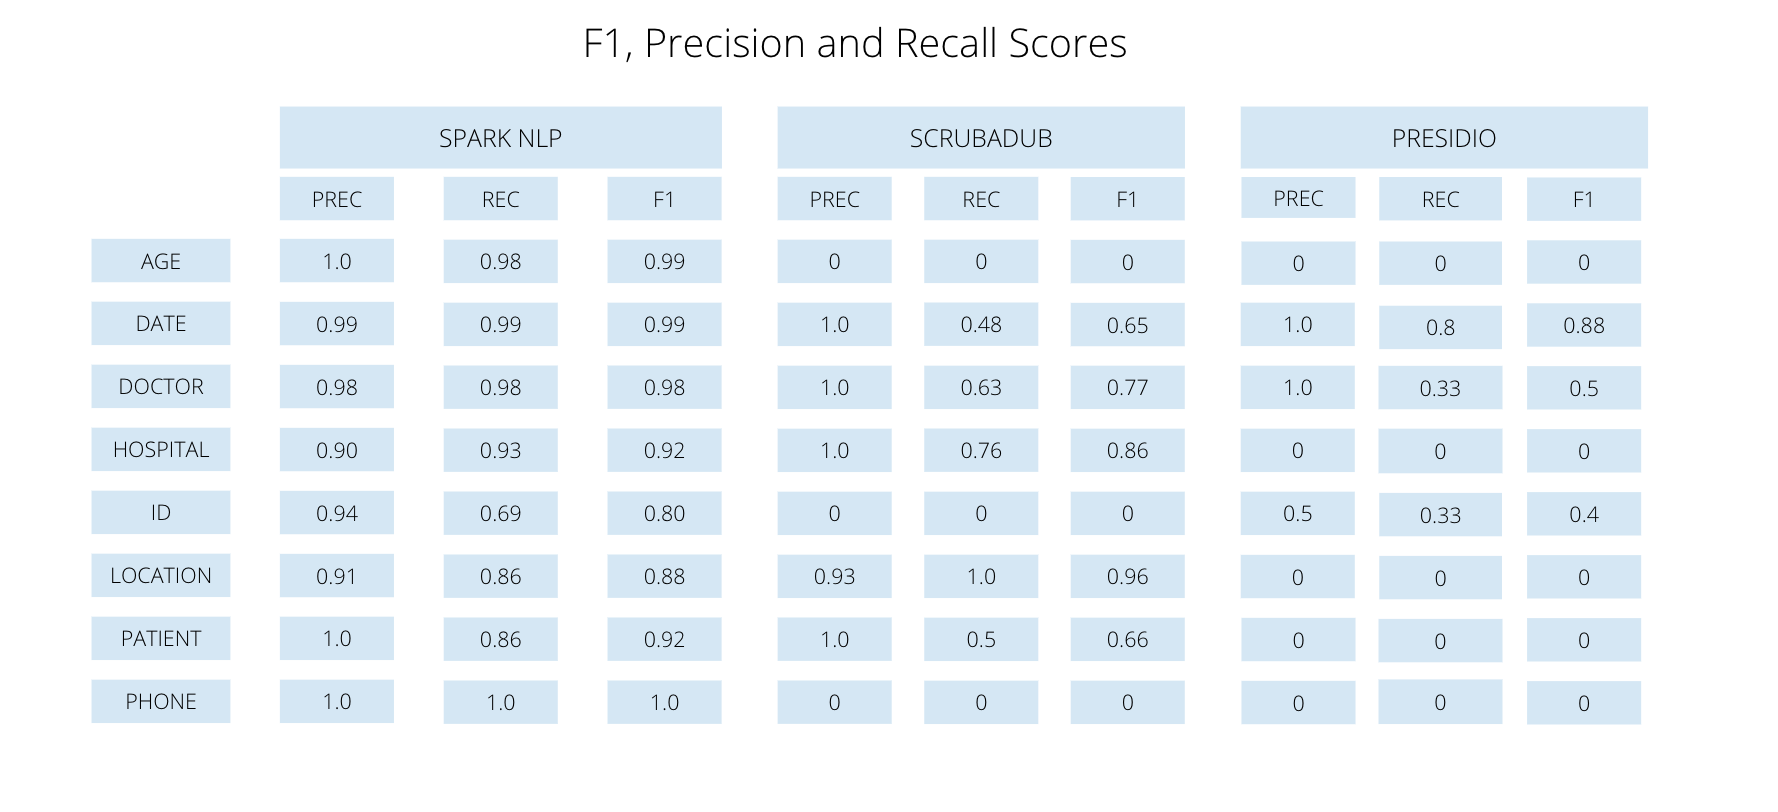

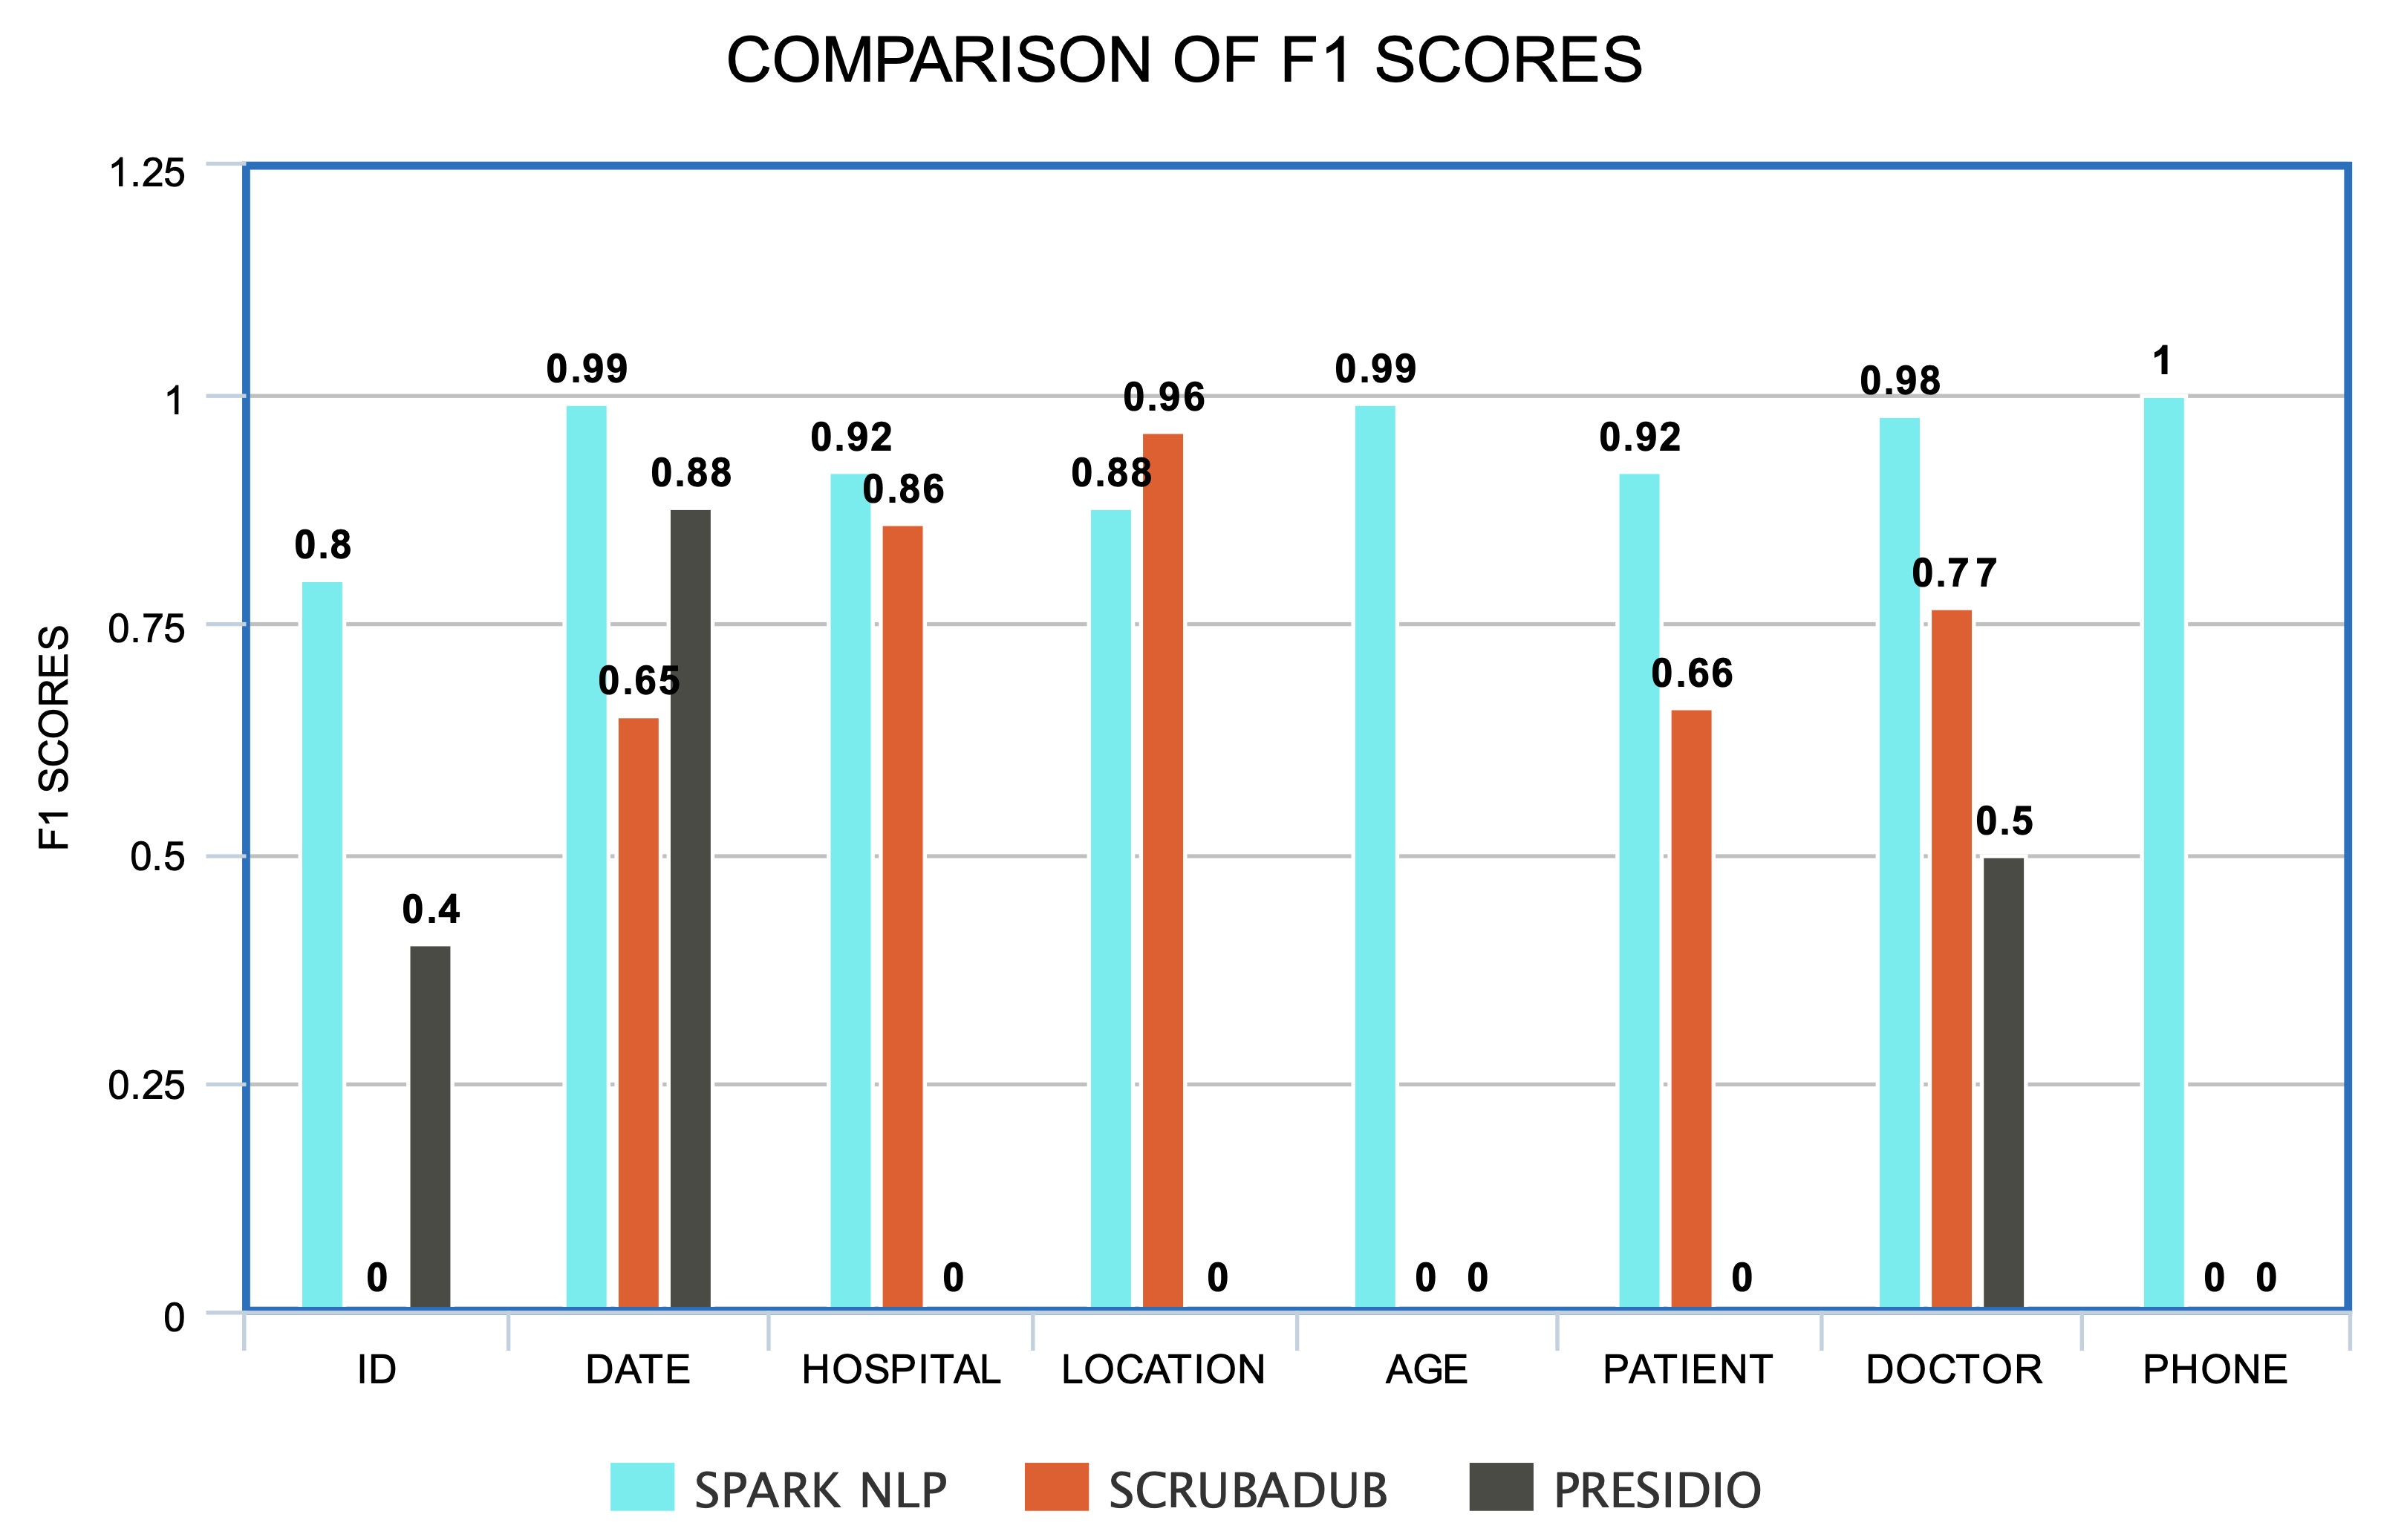

# IMPORTANT NOTES TO CONSIDER BEFORE MOVING FORWARD
1. All libraries tested here have different tags. A map of entities is provided.
2. All libraries have different annotations guidelines, so we have considered as value *fuzzy matches*, with similarity bigger than the 60% of the annotated by JSL chunk (For some APIs, the chunk "Children Care Clinic" is detected including the word "Clinic", for others only proper names ("Children Care"). Both may be valid, they just depend on the [annotation guidelines](https://https://www.johnsnowlabs.com/inter-annotator-agreement-charts-transfer-learning-training-without-license-custom-training-script-with-annotation-lab/)).
3. All libraries have **customization** capabilities, that mean you can get much better results if you use some in-house knowledge, rule-based approach or finetunning. However, the aim of this benchmark is to check **OUT OF THE BOX **capabilities without any customization.
4. All libraries have more labels that the ones we included here, we just got a sample of 8 representative labels (`ID, DATE, HOSPITAL, LOCATION, AGE, PATIENT, DOCTOR, PHONE`)

# Labels available in each API
Not all the API have the same specificity using labels. Some of them use more high-level tags (for example, `NAME` for both *Doctor* and *Patient* names, or `LOCATION` *City*, *ZIP*, even *Hospital*) but some others go low-level, so you can be able to differentiate between Doctors and Patients, what we should appreaciate.

The more **specificity** - the better, because as a rule of thumb, the more specific the less accurate you usually are: detecting `NAME` is evidently *easier* than *detecting* and *asserting* if that name is a `Doctor`'s name or a `Patient`'s name.

Same happens with LOCATIONS and subentities (Street, City, etc) and many other tasks.

Our reference is the annotated labels by _JSL in-house medical annotators_. **Their total amount is 8**.

You can see the rest of API labels in the following table:

|                                   	| Total Tags 	| Any ID Number                                                    	| Any Date      	| Hospital Name    	| Addresses 	| Age              	| Patient's Name 	| Doctor's Name 	| Phone            	|
|-----------------------------------	|------------	|------------------------------------------------------------------	|---------------	|------------------	|-----------	|------------------	|----------------	|---------------	|------------------	|
| ANOOTATOR'S GUIDELINES / TAGS     	| 8          	| ID                                                               	| DATE          	| HOSPITAL         	| LOCATION  	| AGE              	| PATIENT        	| DOCTOR        	| PHONE            	|
| SPARK NLP                         	| 8          	| ID                                                               	| DATE          	| HOSPITAL         	| LOCATION  	| AGE              	| PATIENT        	| DOCTOR        	| PHONE            	|
| SCRUBADUB WITH SPACY TRANSFORMERS 	| 5          	|  - NOT DETECTED -                                                	| DATE_OF_BIRTH 	| ORGANIZATION     	| LOCATION  	| - NOT DETECTED - 	| NAME           	| NAME          	| - NOT DETECTED - 	|
| PRESIDIO WITH SPACY TRANSFORMERS  	| 6          	| MEDICAL_LICENSE, US_DRIVER_LICENSE, US_PASSPORT, US_SSN, US_ITIN 	| DATE_TIME     	| - NOT DETECTED - 	| ADDRESS   	| - NOT DETECTED - 	| PERSON         	| PERSON        	| PHONE_NUMBER     	|

## Which is the most specific library?
The most specific library is **Spark NLP for Healthcare**, since it's the only one able to distinguish between a Patient and a Doctor Name, a Hospital and other Organizations or Addresses, etc.

This does not say anything about the accuracy of those tags. At the end of the day, you can have just one tag **NAME** or **LOCATION** and be able to detect all patients vs doctors, or organizations vs hospitals.

However, just imagine you want to mask or obfuscate the **Hospital** name. If you detect it as **ORGANIZATION** you may mask it as **ORG** and obfuscate it as "McDonalds". It is much better to be aware it's a Hospital and obfuscate is as **Mt. Sinai** instead.

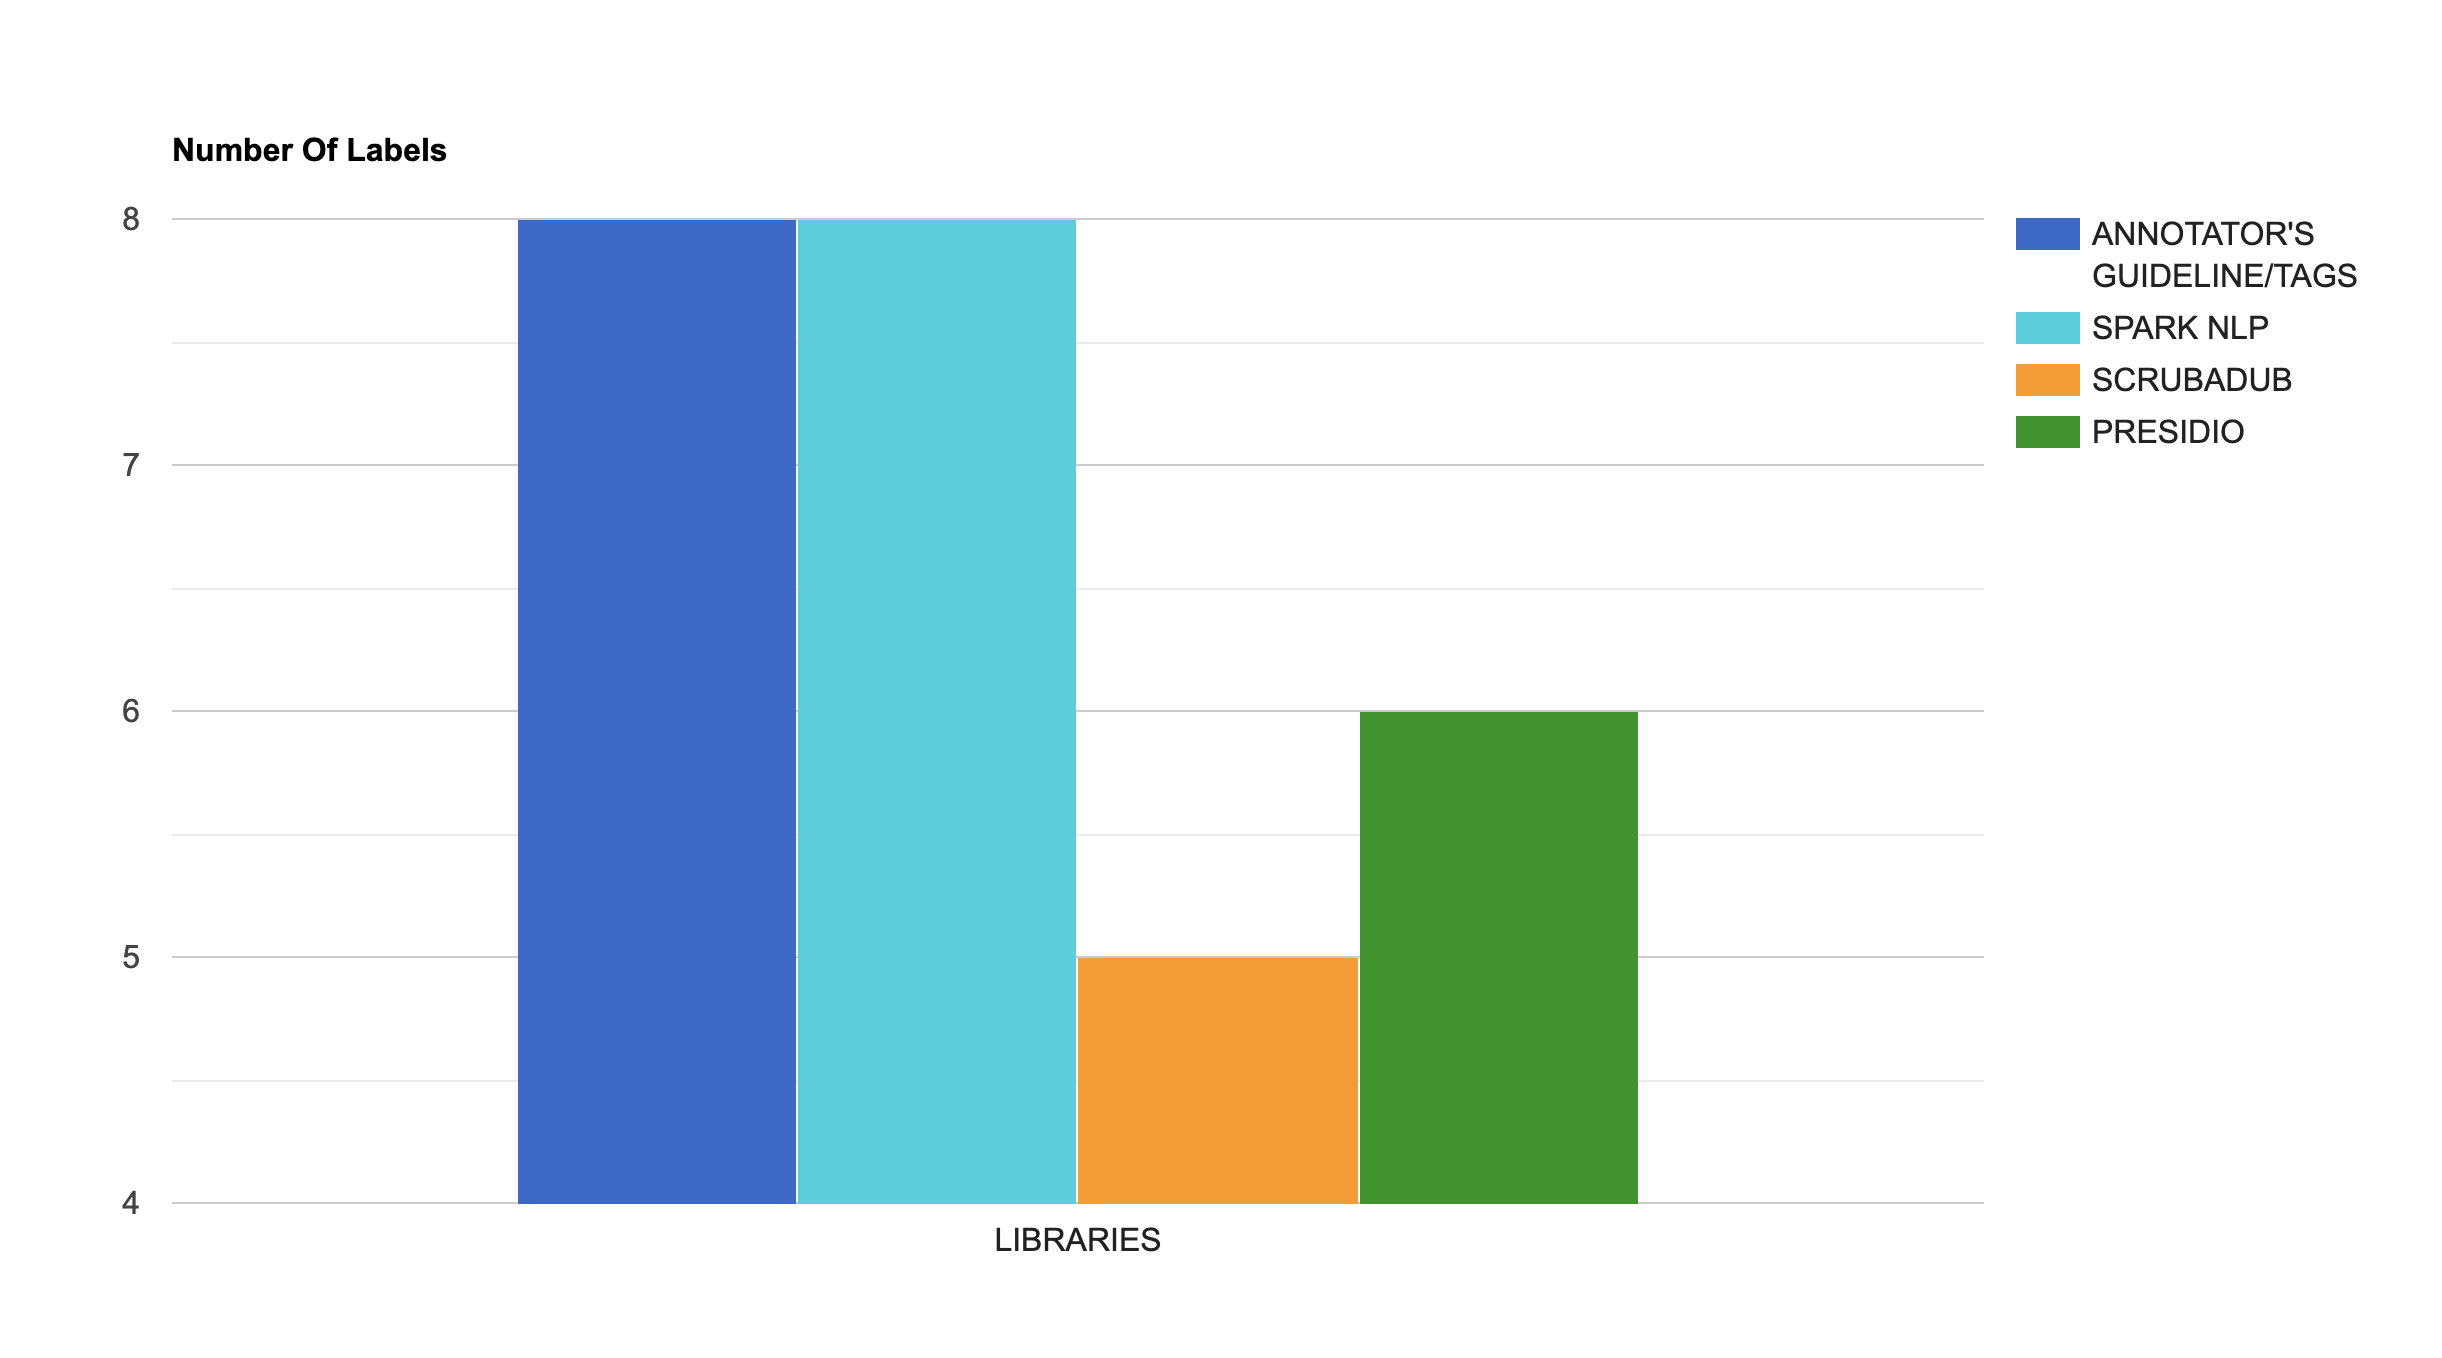

# Which has the best out-of-the-box performance?
Here is the performance for the 8 annotated tags by in-house JSL medical annotators.

NOTE1: all the API have different specificity. That means that, for Spark NLP, a Hospital will be detected as "**HOSPITAL**" but for Azure it may be an "**Organization**". We need to be **permissive** because different guidelines were applied when training those models in the different providers.

```
{
    'DATE': ['DATE', 'DateTime', 'DATE_OF_BIRTH', 'DATE_TIME'],
    'ID': ['ID', 'MEDICALRECORD', 'IDNUM', 'MEDICAL_LICENSE', 'US_DRIVER_LICENSE', 'US_PASSPORT', 'US_SSN', 'US_ITIN'],
    'AGE': ['AGE', 'Quantity'],
    'PHONE': ['PHONE', 'PHONE_OR_FAX', 'PhoneNumber', 'PHONE_NUMBER', 'CONTACT'],
    'DOCTOR': ['DOCTOR', 'NAME', 'Person', 'PERSON_NAME', 'PATIENT', 'USERNAME', 'PERSON'],
    'PATIENT': ['PATIENT', 'NAME', 'Person', 'PERSON_NAME', 'DOCTOR', 'USERNAME', 'PERSON'],
    'HOSPITAL': ['HOSPITAL', 'ADDRESS', 'Organization', 'Address', 'ORGANIZATION', 'LOCATION'],
    'LOCATION': ['LOCATION', 'ADDRESS', 'Address', 'Location', 'Organization', 'STATE', 'COUNTRY', 'STREET', 'CITY', 'HOSPITAL']
}
```

The results show that, for the *100 clinical notes* of *n2c2 corpus*, the most accurate model is the one from **Spark NLP For Healthcare**, followed very closely by **AWS Comprehend Medical**.

Also, **Spark NLP** is the most specific of them all.

Now that we have seen the high-level picture, let's see the advantages and disadvantages of all of them

## Spark NLP
- Best accuracy
- Best specificity: very granular entities
- Can be augmented with Spark NLP NER models and rule-based components
- Can run in air-gapped environments
- License model: pay a license and use as much as you need


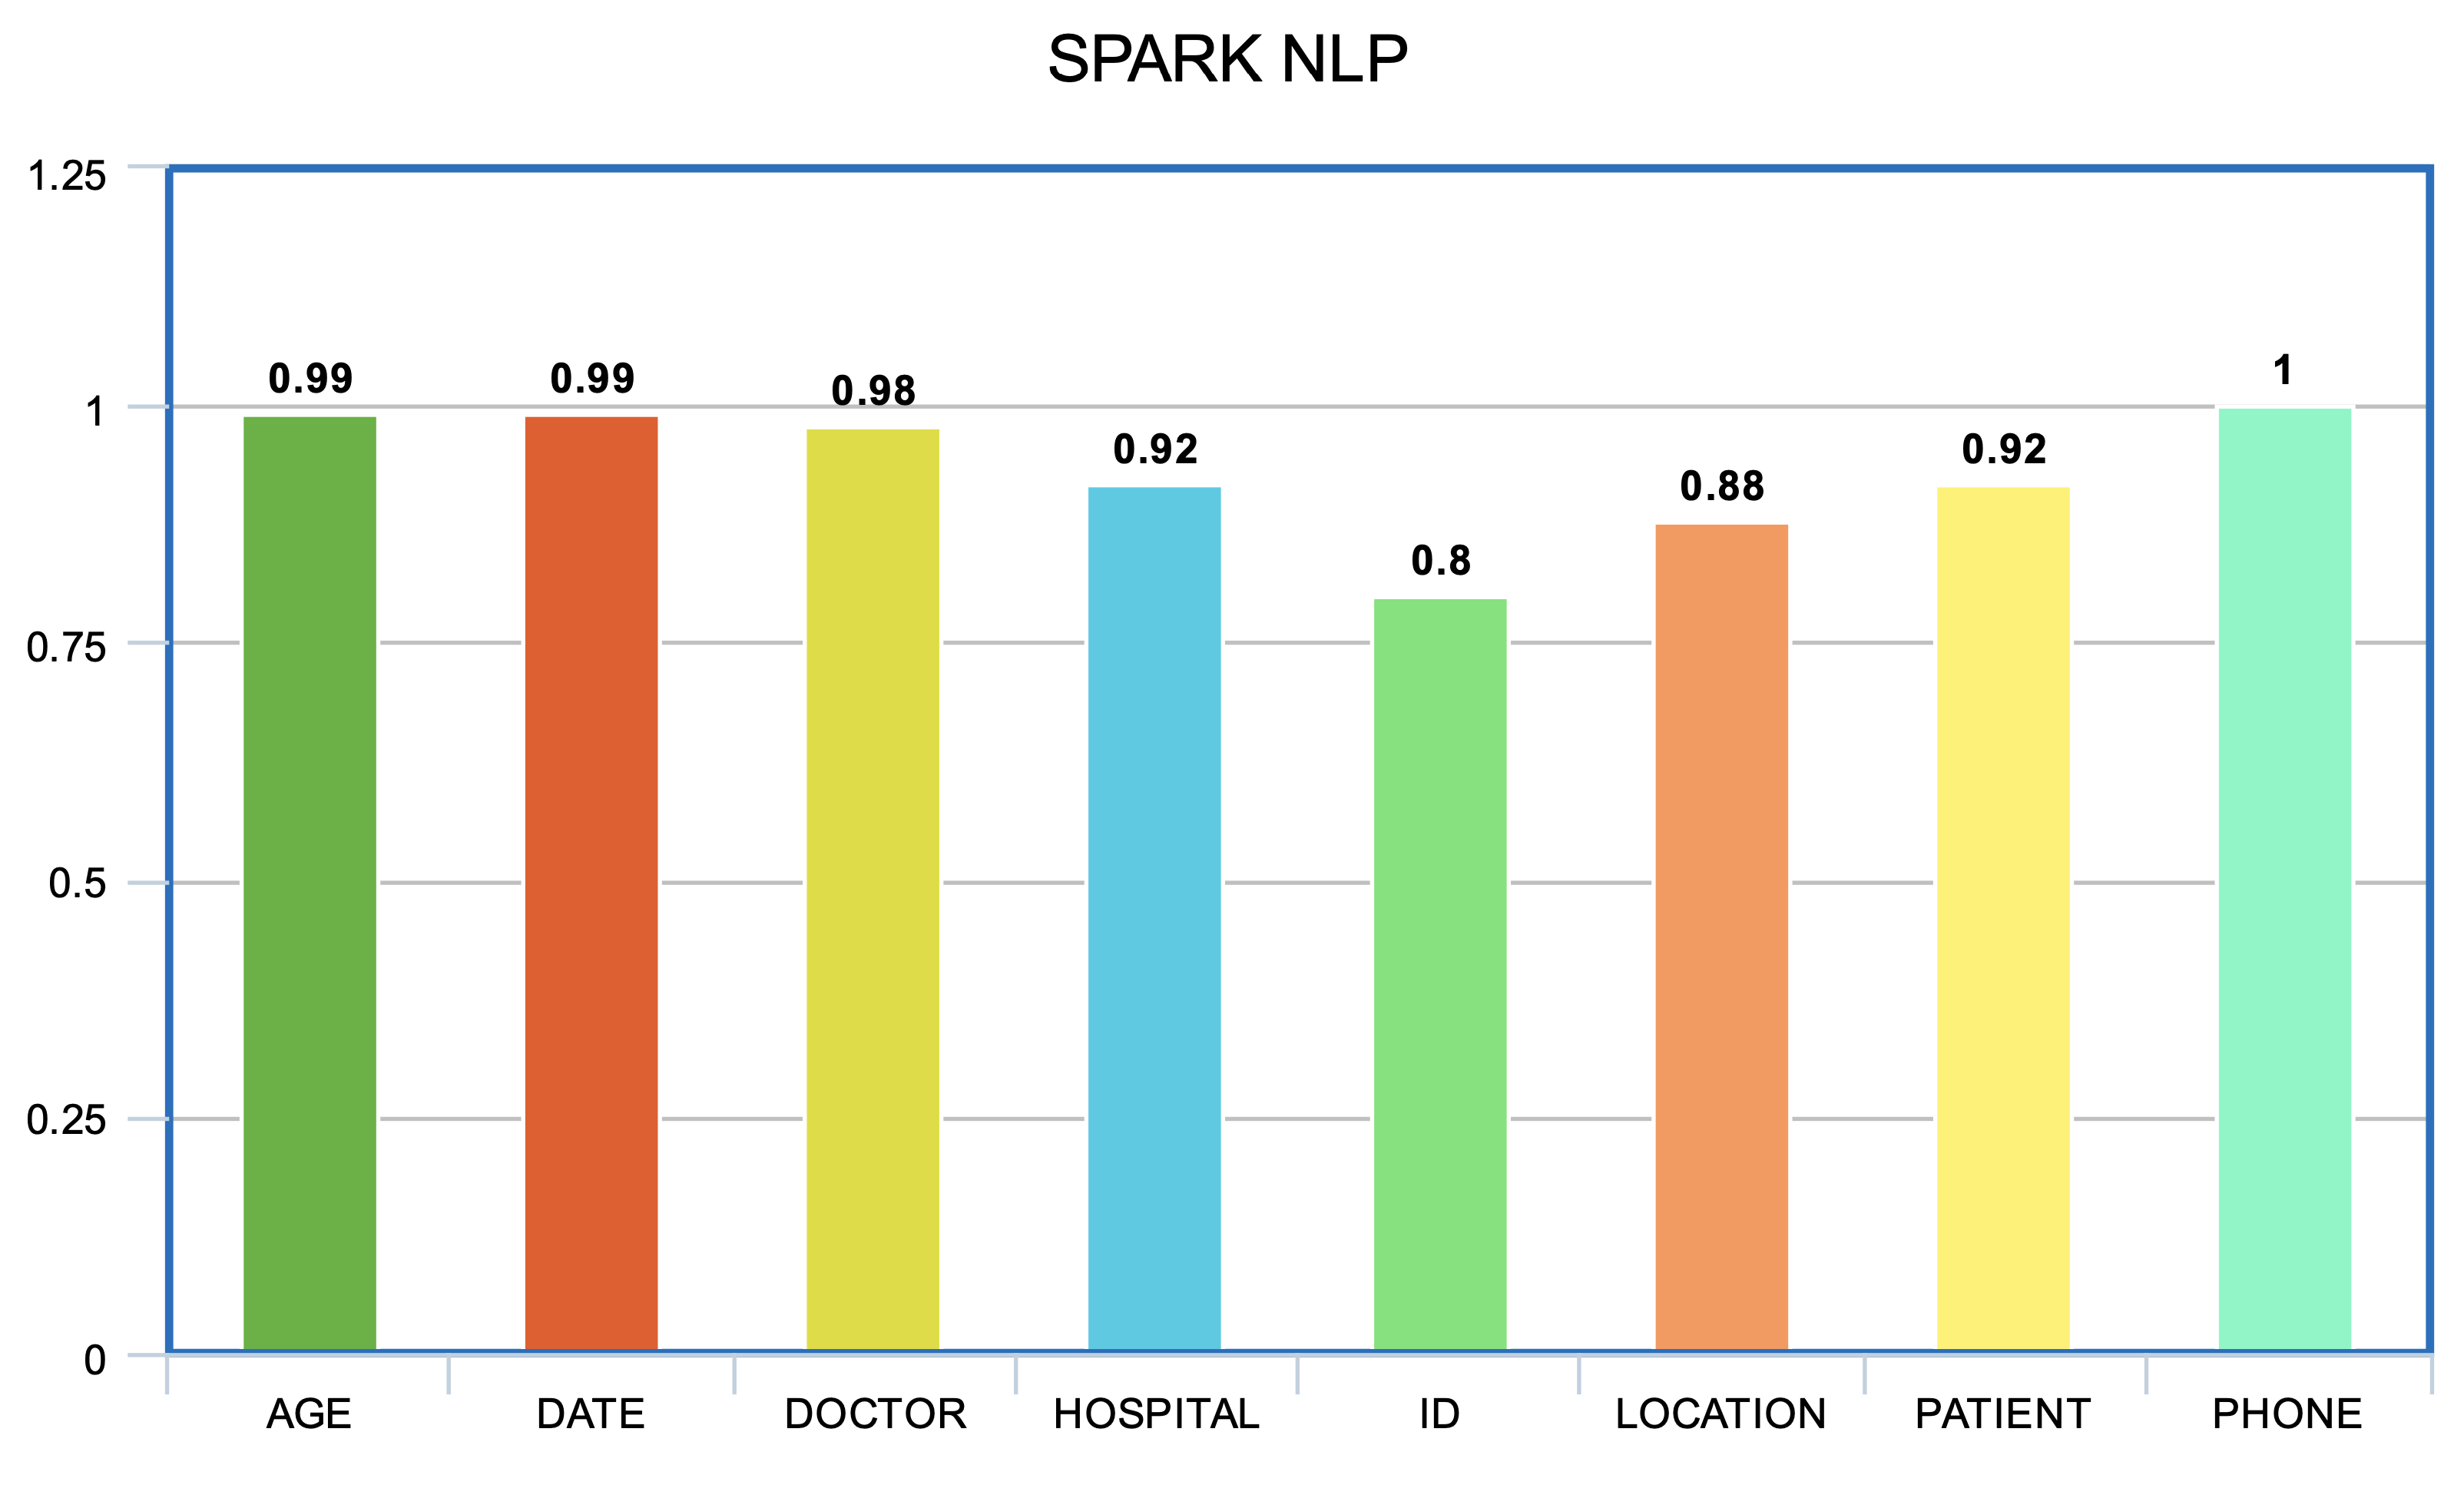


## Scrubadub with Spacy Transformers
Scrubadub allows you augment the existing annotators and add Spacy Transformers. But, if for the other providers we were able to test something out-of-the-box, with little customization, we found that with Scrubadub we needed to look for the proper annotators and the proper transformers in Spacy.
- Low number of out-of-the-box tags, you need to look for Spacy Transformers to augment the tags or create your own rule-base annotators
- For those transformers we used, the accuracy was low
- Free to use (no license required)
- Can run in air-gapped environments
- We could not find proper Spacy Models or Scrubadub out-of-the-box annotators to properly work with AGE, ID and PHONE.

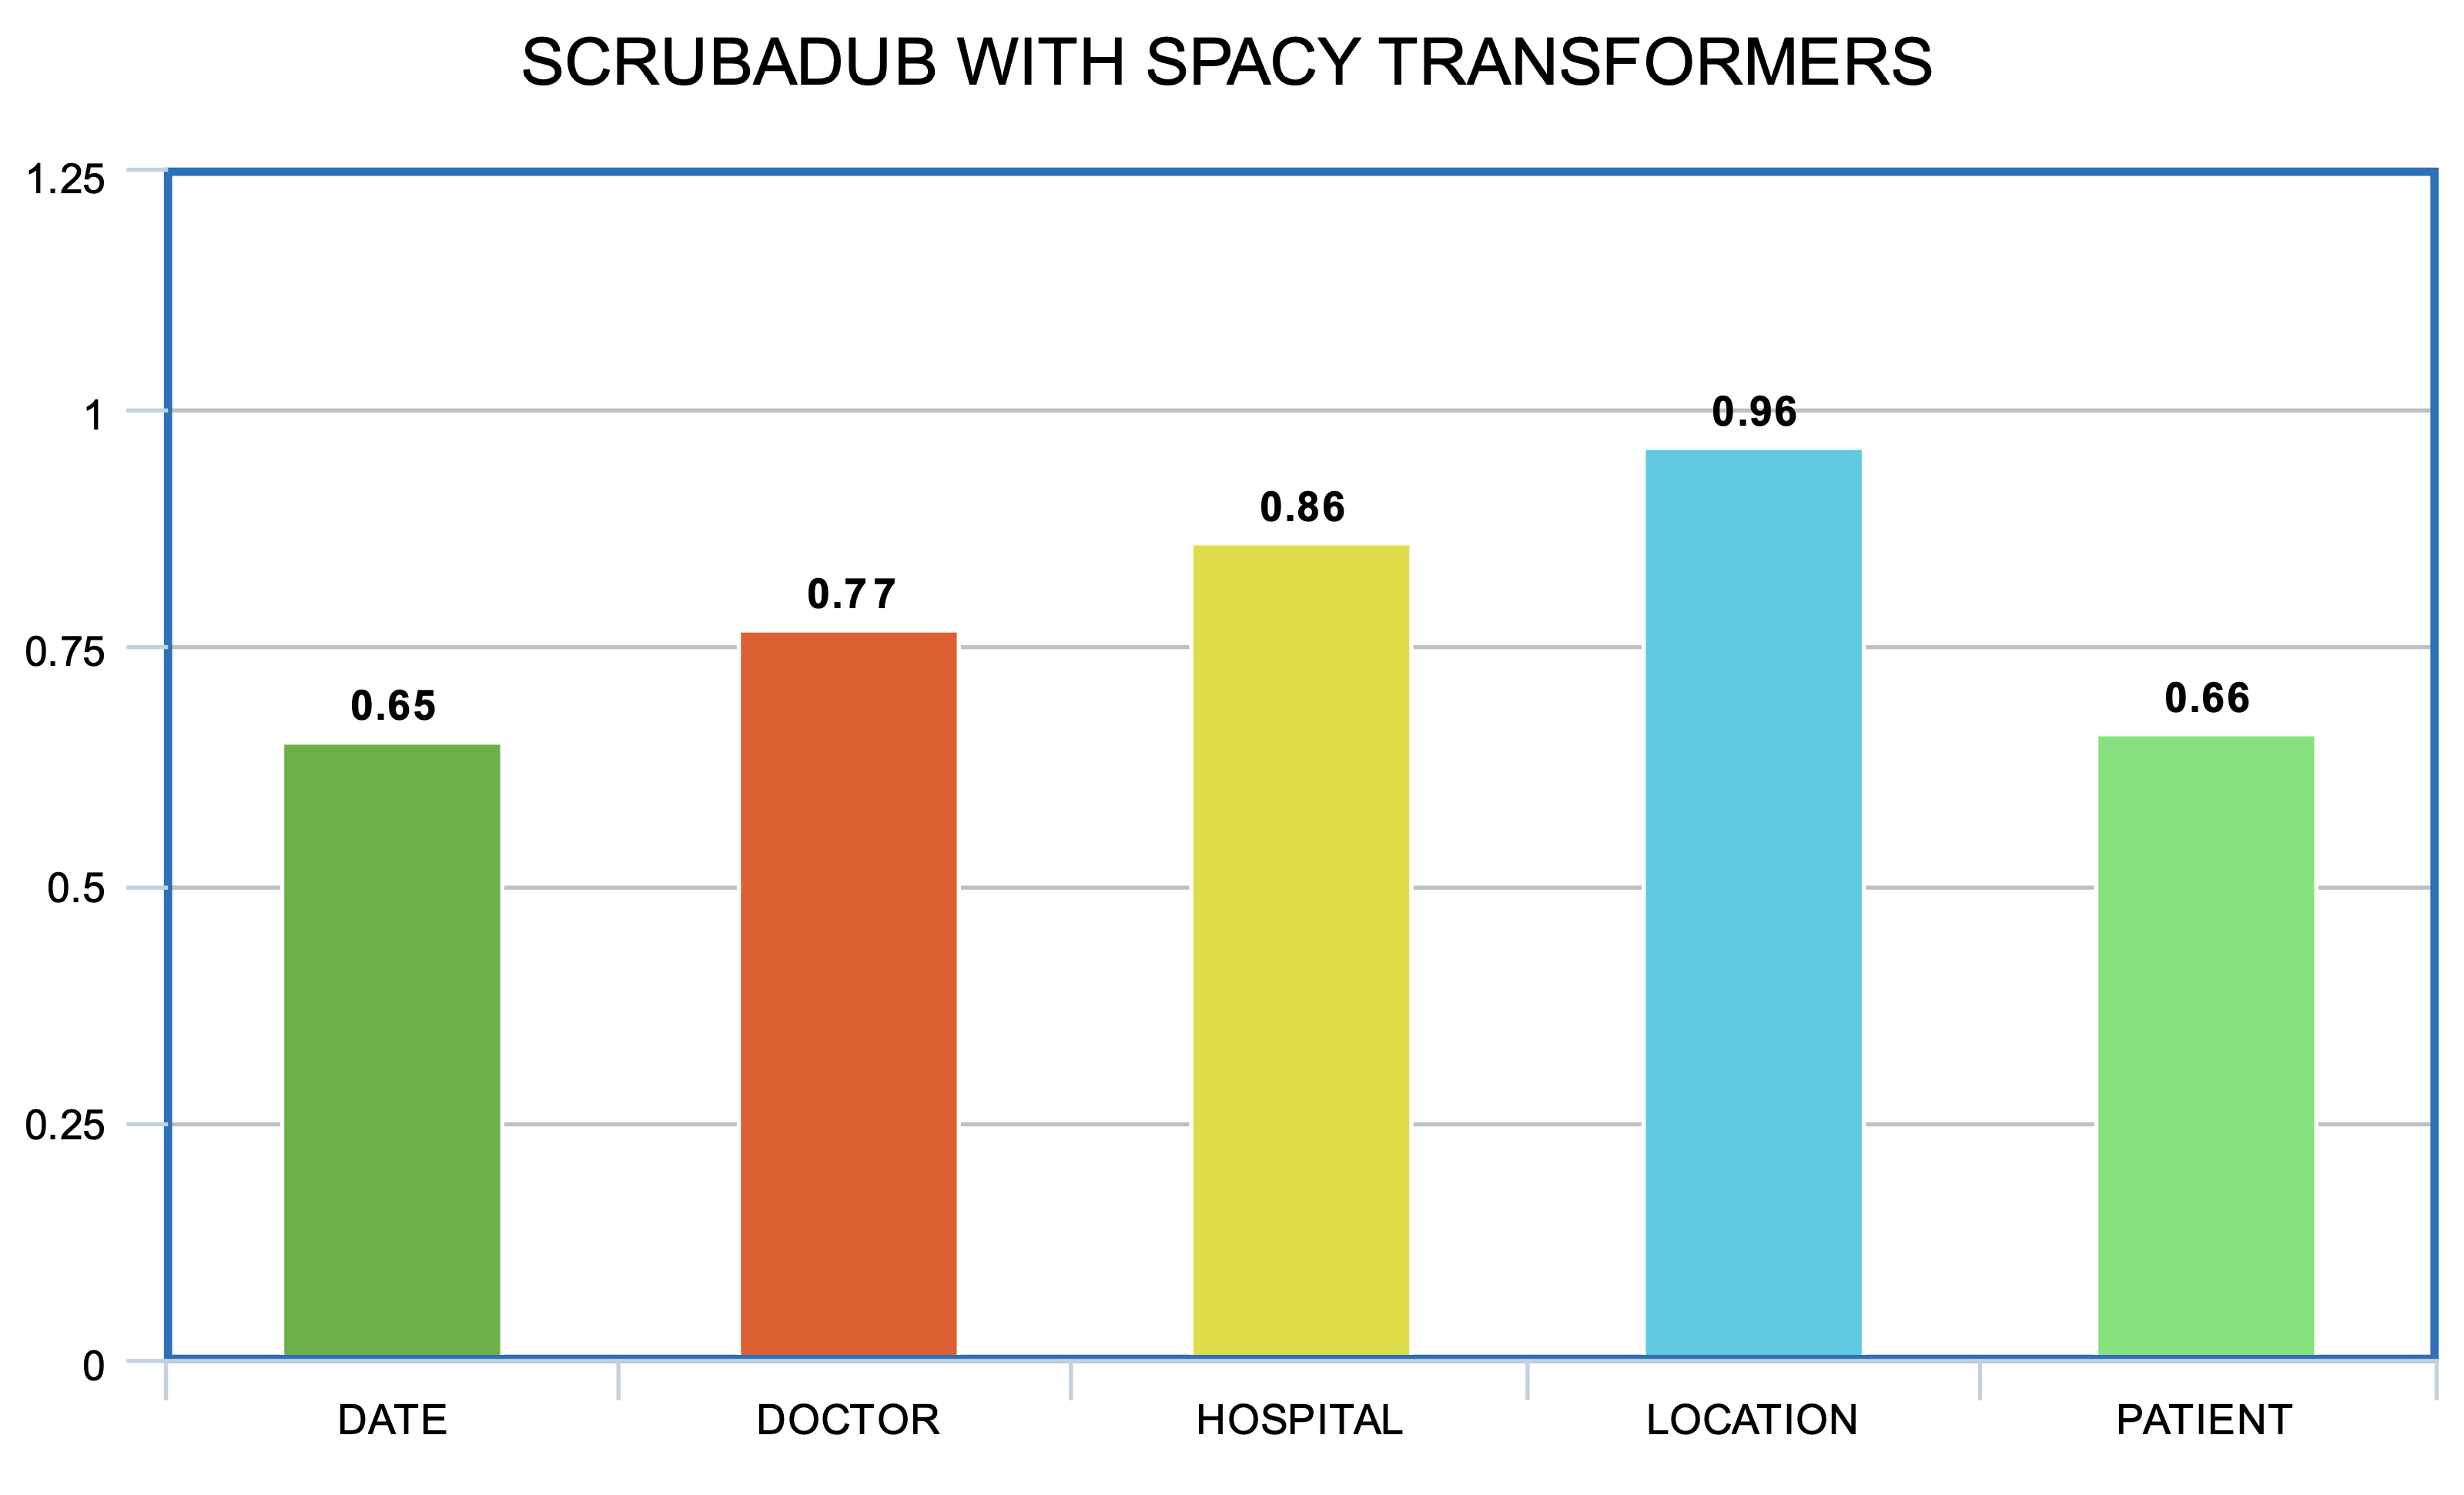

```        
        SPARK NLP    SCRUBADUB
AGE	      1	   -
DATE	     1       0.65
DOCTOR	   0.98    0.77
HOSPITAL 	0.92    0.86
ID	       0.93    -
LOCATION 	0.9     0.96
PATIENT	  0.96    0.66
PHONE	    1       -
```

## Presidio with Spacy Transformers

Presidio helps to ensure sensitive data is properly managed and governed. By Default, Presidio uses Spacy for PII identification and extraction.

 It provides identification and anonymization modules for private entities in text and images such as credit card numbers, names, locations, social security numbers, bitcoin wallets, US phone numbers, financial data and more. <br/>

We could not find proper Spacy Models or Presidio out-of-the-box annotators to properly work with AGE, Hospital Name.

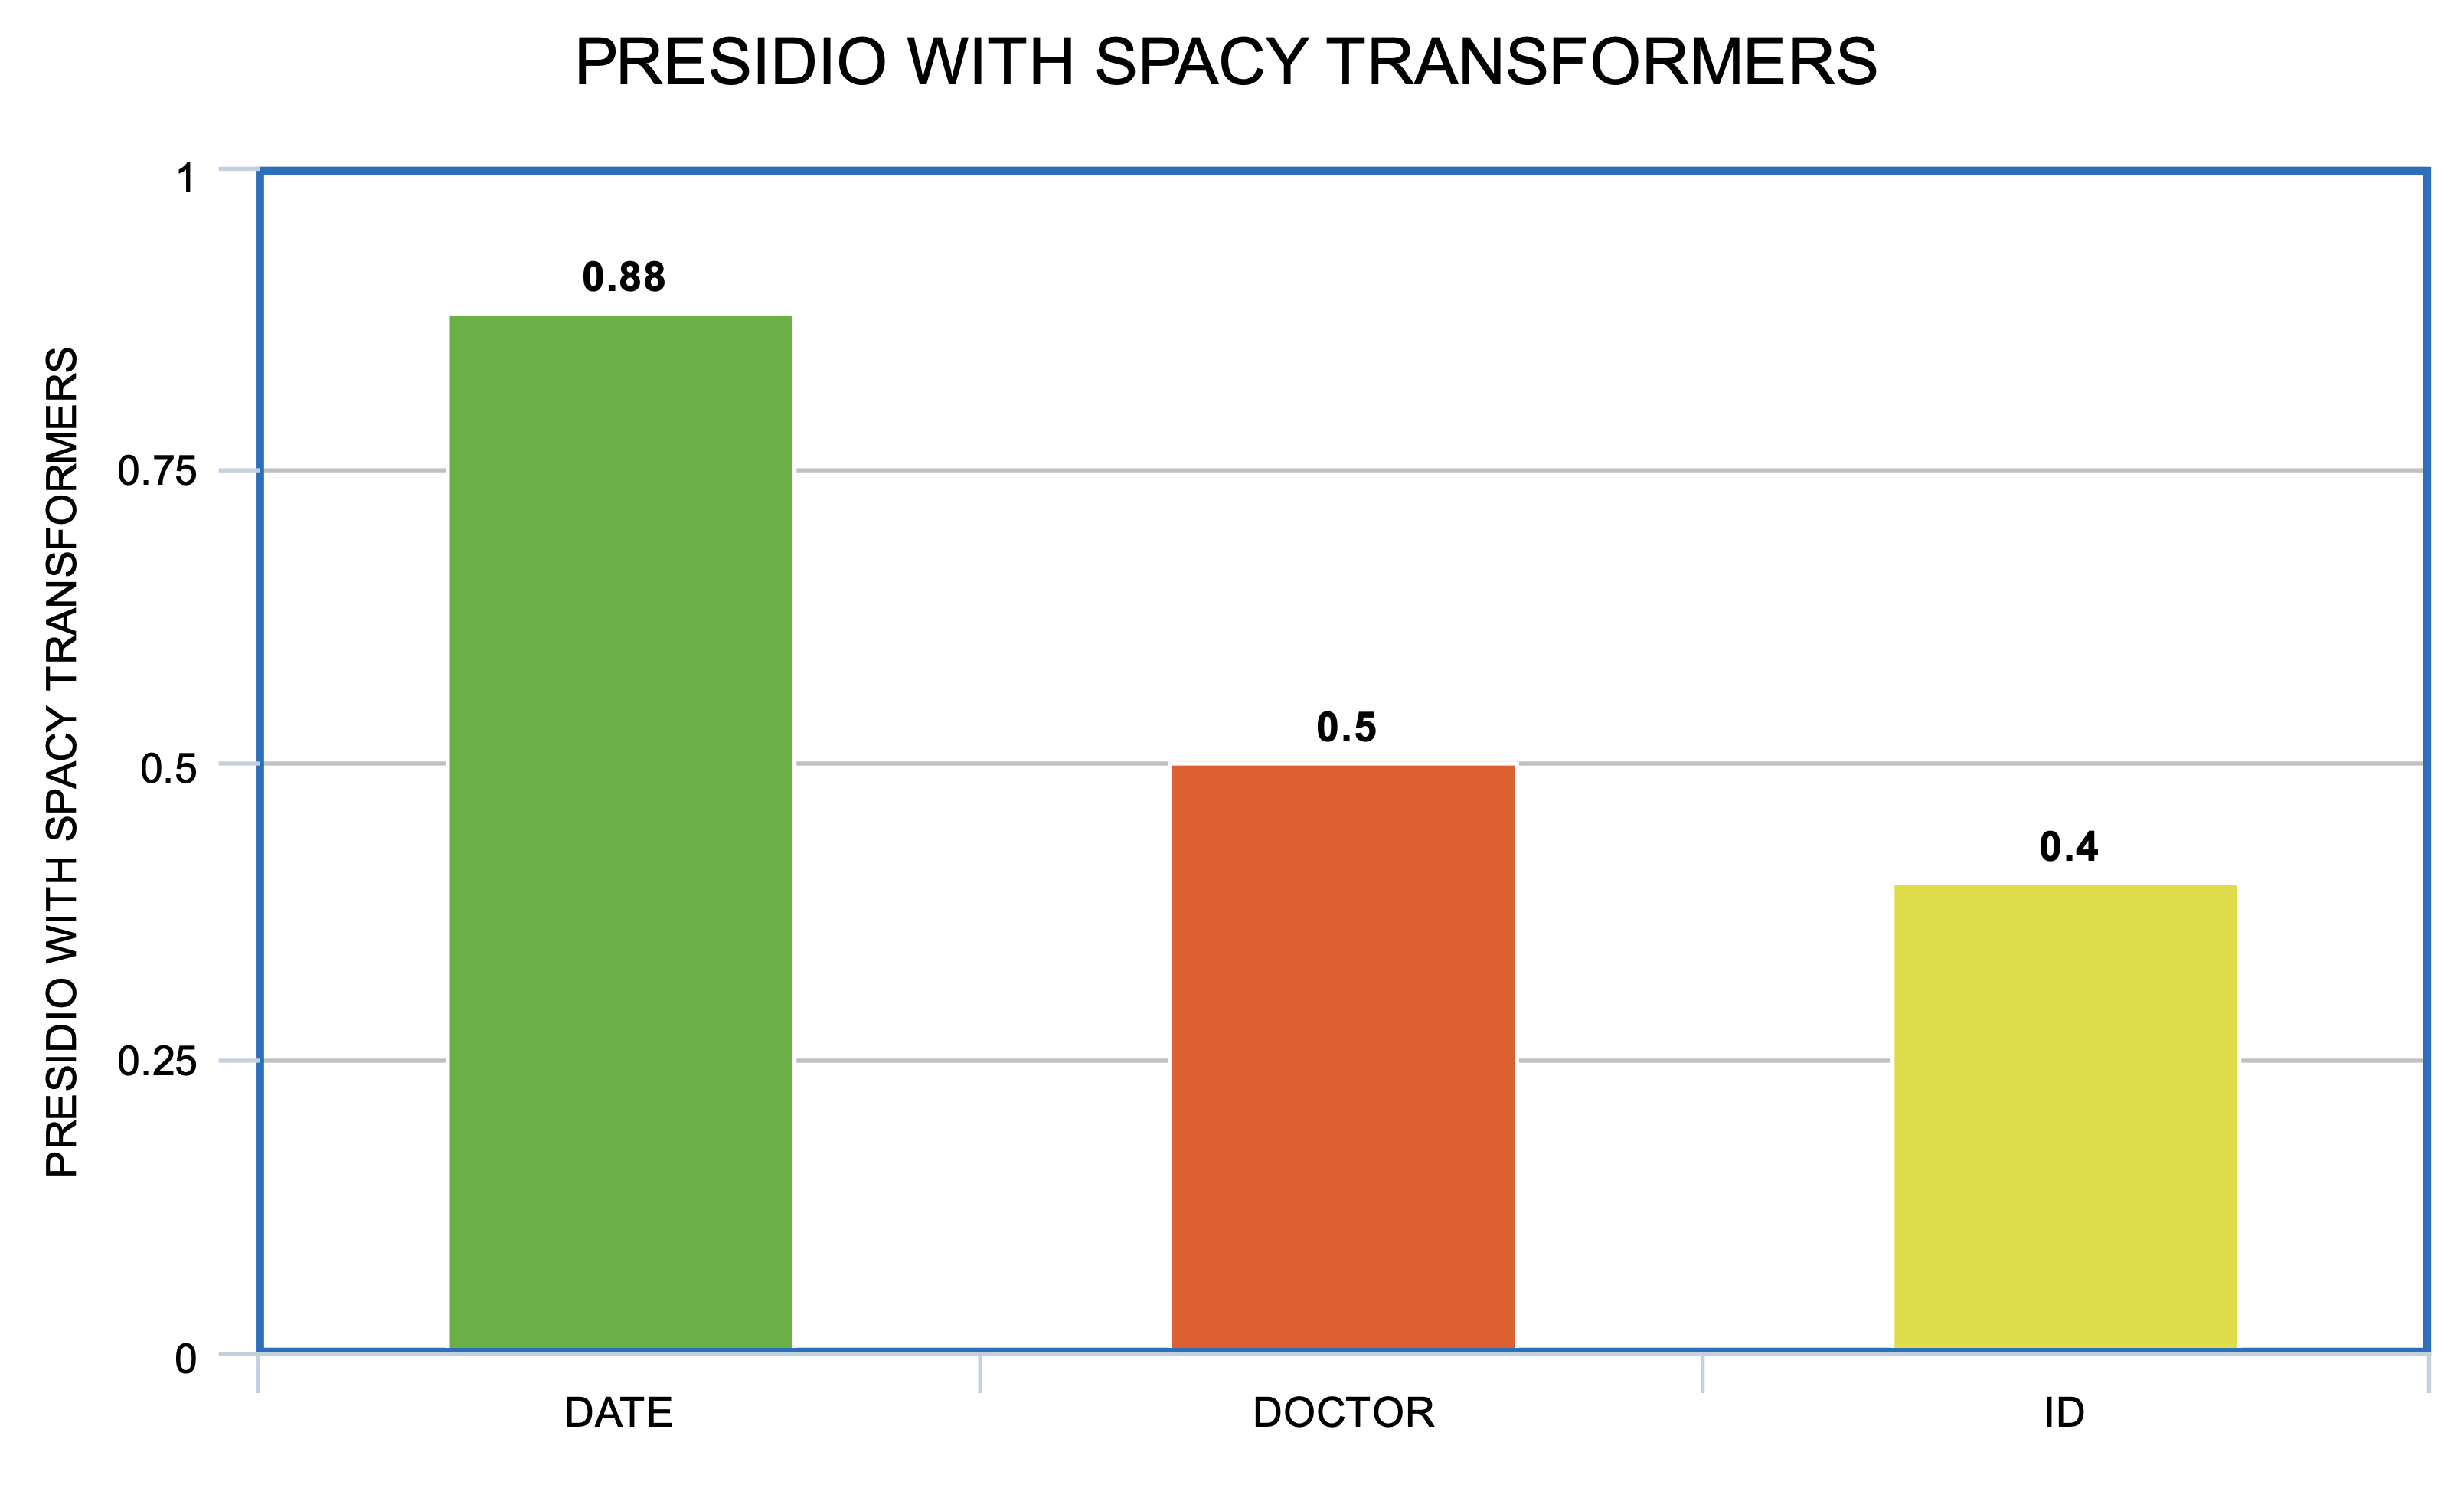

```        
        SPARK NLP    PRESIDIO
AGE	      1	   -
DATE	     1       0.88
DOCTOR	   0.98    0.5
HOSPITAL 	0.92    -
ID	       0.93    0.4
LOCATION 	0.9     -
PATIENT	  0.96    -
PHONE	    1       -
```

# AGGREGATED METRICS

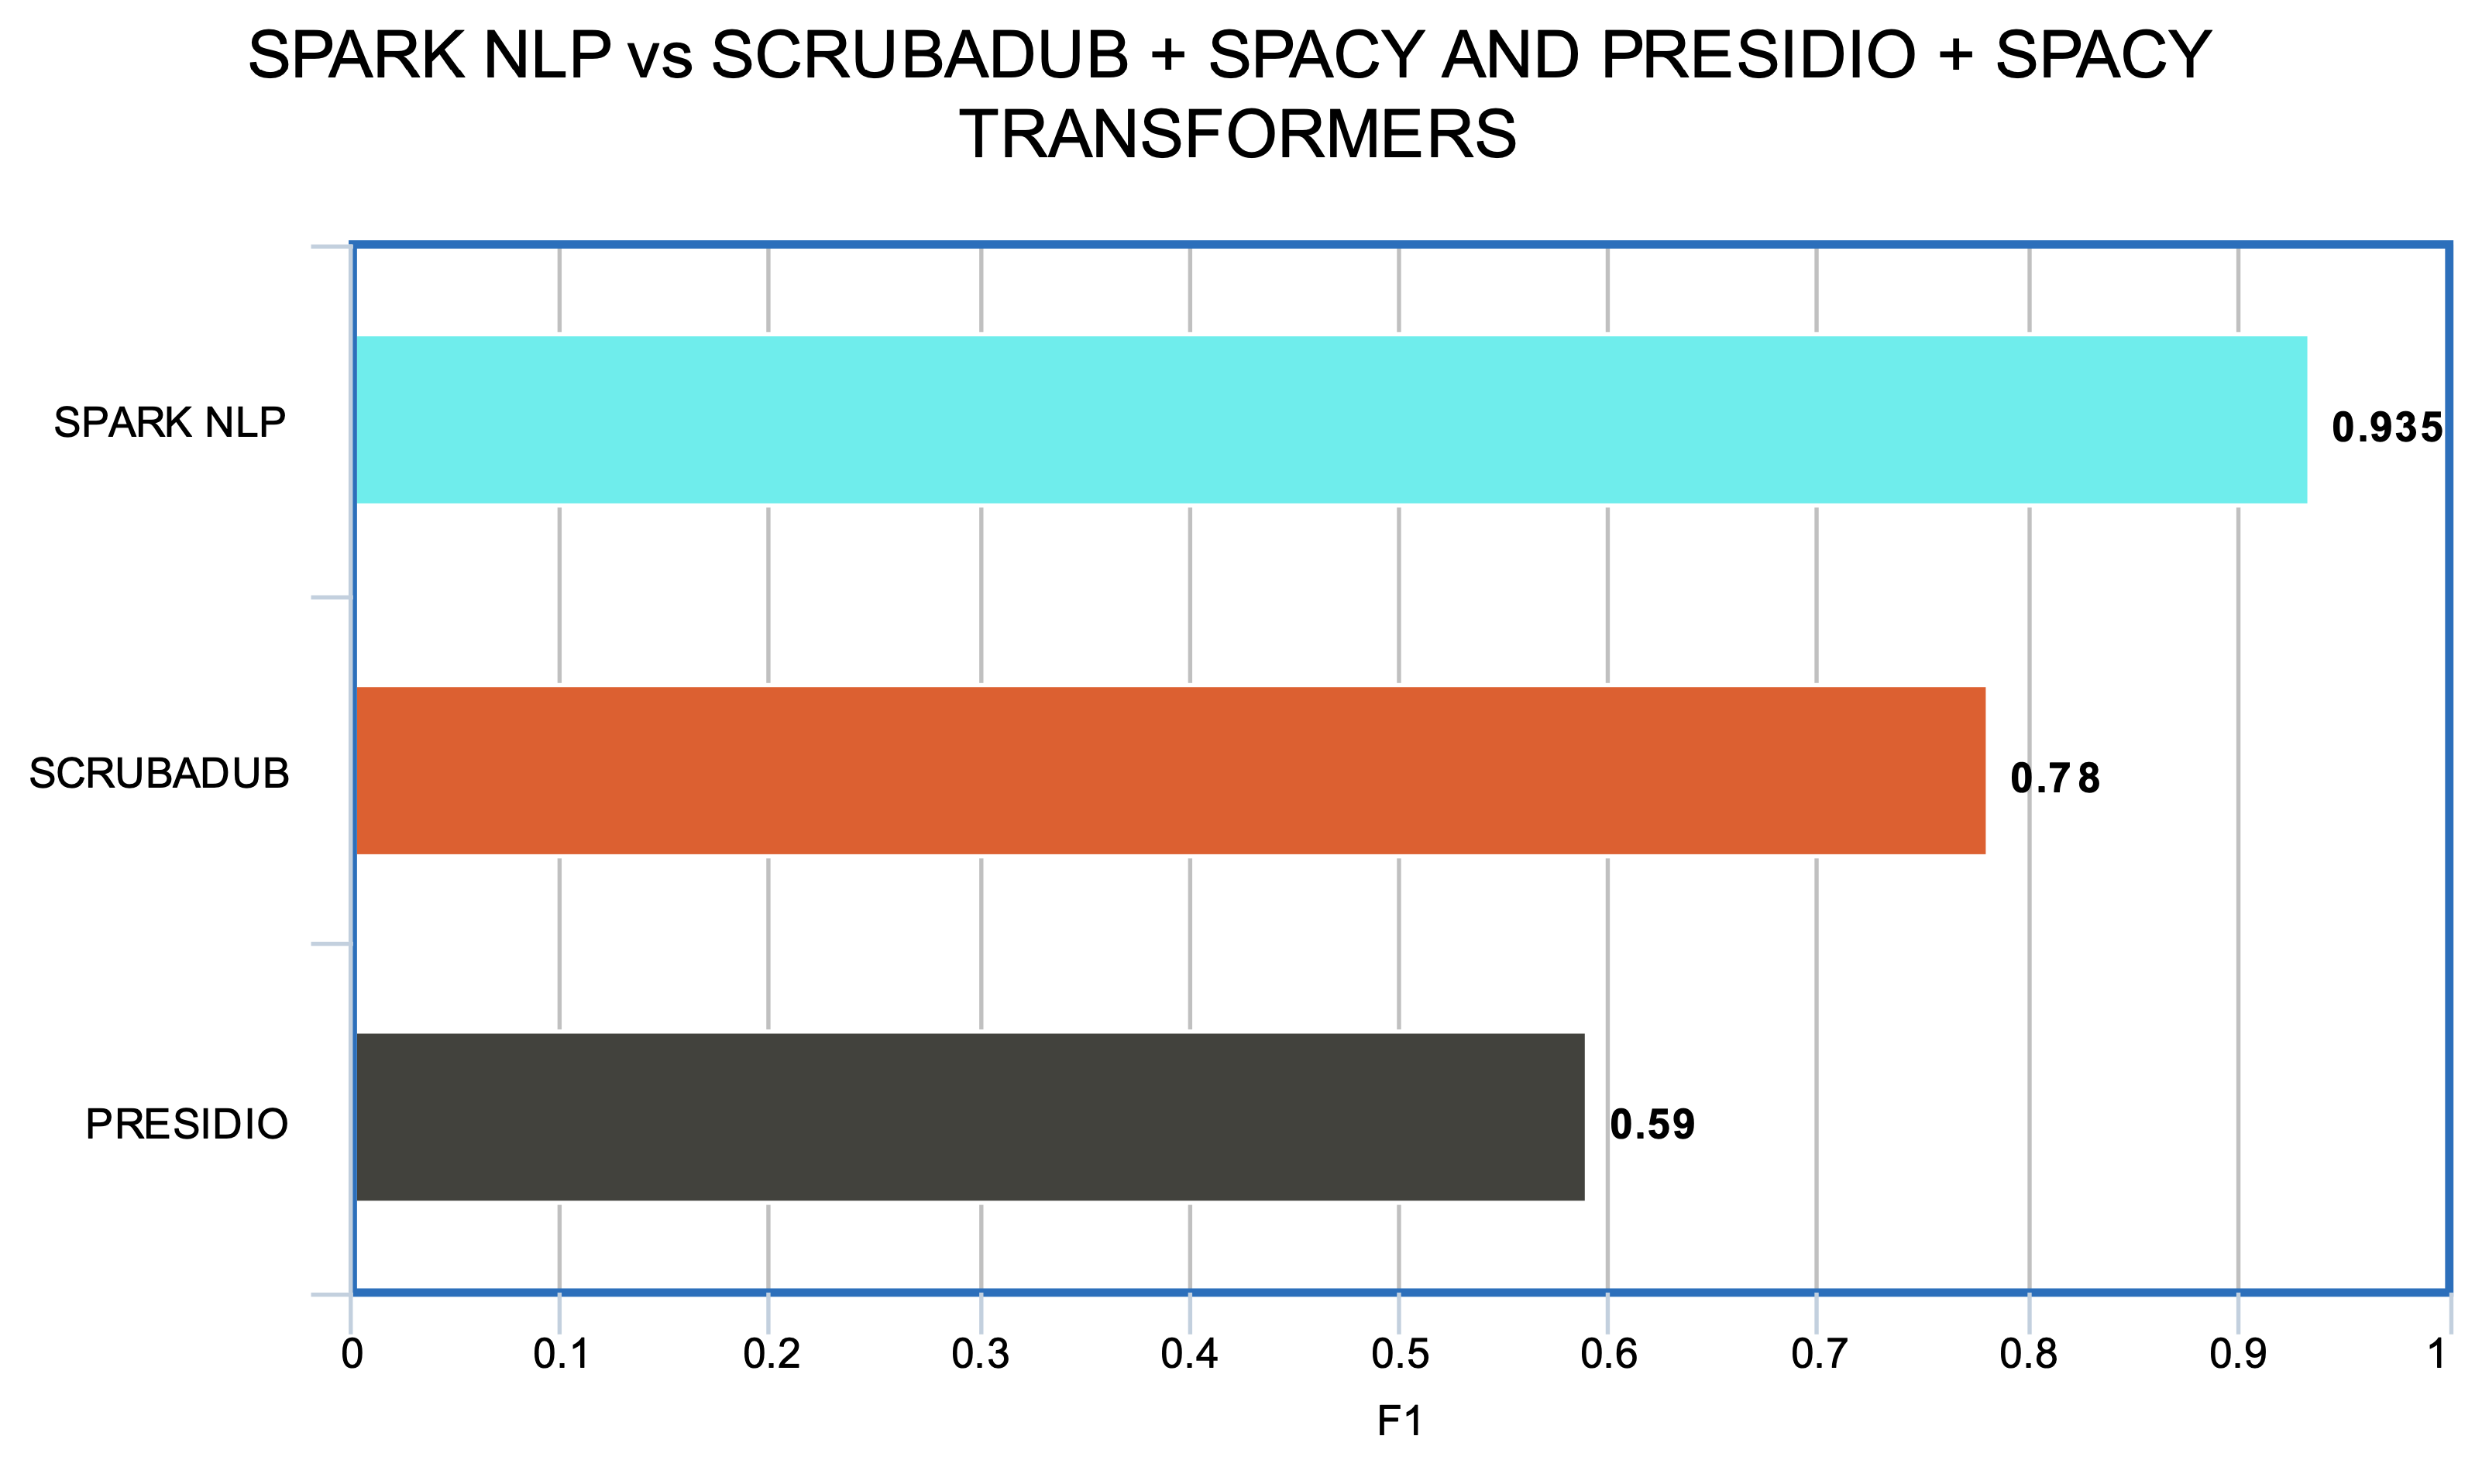

# LET US BEGIN !

# Download some clinical notes from N2C2

In [ ]:
!wget -q https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/tutorials/Certification_Trainings/Healthcare/data/deid_surrogate_test_all_groundtruth_version2.xml

# Parsing the XML

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('deid_surrogate_test_all_groundtruth_version2.xml')
root = tree.getroot()

# Retrieving texts and PHI fields

In [ ]:
import re
data = []
for r in root.findall('RECORD'):
    for t in r.findall('TEXT'):
        children = []
        for c in t:
            children.append((c.text, c.attrib['TYPE']))
        text = "".join([ t.text ] + [ ET.tostring(e).decode('utf-8') for e in t])
        unmasked_text = re.sub(r"<PHI [^>]*>", "", text)
        unmasked_text = re.sub(r"</PHI>", "", unmasked_text)
        data.append({'unmasked_text': unmasked_text, 'text': text, 'phi': children})

In [ ]:
len(data)

220

In [ ]:
# Printing data[0], that contains the information of the first clinical note.
print(data[0]['unmasked_text'])


113416550
PRGH
13523357
630190
6/7/1999 12:00:00 AM
Discharge Summary
Signed
DIS
Admission Date :
06/07/1999
Report Status :
Signed
Discharge Date :
06/13/1999
HISTORY OF PRESENT ILLNESS :
Essentially , Mr. Cornea is a 60 year old male who noted the onset of dark urine during early January .
He underwent CT and ERCP at the Lisonatemi Faylandsburgnic, Community Hospital with a stent placement and resolution of jaundice .
He underwent an ECHO and endoscopy at Ingree and Ot of Weamanshy Medical Center on April 28 .
He was found to have a large , bulging , extrinsic mass in the lesser curvature of his stomach .
Fine needle aspiration showed atypical cells , positively reactive mesothelial cells .
Abdominal CT on April 14 , showed a 12 x 8 x 8 cm mass in the region of the left liver , and appeared to be from the lesser curvature of the stomach or left liver .
He denied any nausea , vomiting , anorexia , or weight loss .
He states that his color in urine or in stool is now normal .
PAST MED

In [ ]:
print(data[0]['phi'])

[('113416550', 'ID'), ('PRGH', 'HOSPITAL'), ('13523357', 'ID'), ('630190', 'ID'), ('6/7', 'DATE'), ('06/07', 'DATE'), ('06/13', 'DATE'), ('Cornea', 'PATIENT'), ('January', 'DATE'), ('Lisonatemi Faylandsburgnic, Community Hospital', 'HOSPITAL'), ('Ingree and Ot of Weamanshy Medical Center', 'HOSPITAL'), ('April 28', 'DATE'), ('April 14', 'DATE'), ('7th of June', 'DATE'), ('Kotefooksshuff', 'DOCTOR'), ('THAMETO DOYLE', 'DOCTOR'), ('OS43', 'ID'), ('PRO R. KOTEFOOKSSHUFF', 'DOCTOR'), ('RF6 ZY525/1920', 'ID'), ('69874', 'ID'), ('YFKAJTRZX9', 'ID'), ('06/13', 'DATE'), ('06/13', 'DATE'), ('KE9', 'ID')]


# BENCHMARK PREPARATION

In [ ]:
import random
CLINICAL_NOTES = 100
RANDOM_SEED = 0.1

## Shuffling

In [ ]:
f_seed = lambda: RANDOM_SEED
random.shuffle(data, f_seed)
data = data[:100]
len(data)

<ipython-input-8-50f44fd2cd7a>:2: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(data, f_seed)


100

In [ ]:
data[0]['phi']

[('929334185', 'ID'),
 ('FIH', 'HOSPITAL'),
 ('8151167', 'ID'),
 ('53653/y9m1', 'ID'),
 ('539442', 'ID'),
 ('5/13', 'DATE'),
 ('5/13', 'DATE'),
 ('5/16', 'DATE'),
 ('July', 'DATE'),
 ('July', 'DATE'),
 ('July', 'DATE'),
 ('November', 'DATE'),
 ('September 1', 'DATE'),
 ('November 5', 'DATE'),
 ('September', 'DATE'),
 ('05', 'DATE'),
 ('May 14', 'DATE'),
 ('May 15', 'DATE'),
 ('Douet', 'PATIENT'),
 ('Wires', 'DOCTOR'),
 ('Wires', 'DOCTOR'),
 ('526-6508', 'PHONE'),
 ('May 16', 'DATE'),
 ('Wires', 'DOCTOR'),
 ('Caslighlourdes', 'DOCTOR'),
 ('STIE FYFE', 'DOCTOR'),
 ('RIEMIND CASLIGHLOURDES', 'DOCTOR'),
 ('iv / bmot', 'DOCTOR'),
 ('5/16', 'DATE'),
 ('05/17', 'DATE')]

In [ ]:
import json
with open('100n2c2.json', 'w') as f:
  f.write(json.dumps(data))

In [ ]:
# 1 text per line
with open('100n2c2_texts.json', 'w') as f:
  f.write(json.dumps([{'text': x['unmasked_text']} for x in data]))

# Spark NLP for Healthcare
Let's use Spark NLP for Healthcare's Pretrained Pipeline for `clinical_deidentification`

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs==5.1.0

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install()

In [ ]:
from johnsnowlabs import nlp, medical, visual
import pandas as pd
import json
import warnings
warnings.filterwarnings('ignore')

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

In [ ]:
spark

In [ ]:
deid_pipeline = nlp.PretrainedPipeline("clinical_deidentification_glove_augmented", "en", "clinical/models")

clinical_deidentification_glove_augmented download started this may take some time.
Approx size to download 173 MB
[OK!]


## `annotate()` on PretrainedPipelines uses LightPipelines, what means is optimized for speed

In [ ]:
%%time
res = []
for d in data:
  x = deid_pipeline.annotate(d['unmasked_text'])
  res.append(x)

CPU times: user 1.67 s, sys: 450 ms, total: 2.12 s
Wall time: 2min 23s


In [ ]:
import json
with open('sparknlp_res_xx.json', 'w') as f:
  f.write(json.dumps(res))

# ScrubaDub with original and Spacy Transformers

In [ ]:
!pip install -q scrubadub scrubadub_spacy spacy_transformers

In [ ]:
import scrubadub, scrubadub_spacy

detector_list = [
                 scrubadub.detectors.DateOfBirthDetector,
                 scrubadub_spacy.detectors.spacy_name_title.SpacyNameDetector,
                 scrubadub_spacy.detectors.spacy.SpacyEntityDetector(named_entities=['DATE', 'FAC', 'GPE', 'LOC', 'ORG', 'PER', 'PERSON'])
]
scrubber = scrubadub.Scrubber(detector_list=detector_list)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
scrubadub_spacy.detectors.spacy.SpacyEntityDetector.filth_cls_map

{'FAC': scrubadub.filth.location.LocationFilth,
 'GPE': scrubadub.filth.location.LocationFilth,
 'LOC': scrubadub.filth.location.LocationFilth,
 'PERSON': scrubadub.filth.name.NameFilth,
 'PER': scrubadub.filth.name.NameFilth,
 'ORG': scrubadub.filth.organization.OrganizationFilth,
 'DATE': scrubadub.filth.date_of_birth.DateOfBirthFilth}

In [ ]:
%%time
res = []
for d in data:
  x = scrubber.clean(d['unmasked_text'])
  x = x.replace('+ORGANIZATION', '')
  x = x.replace('+NAME', '')
  res.append({'masked_text': x, 'original_text': d['unmasked_text']})

CPU times: user 26min 2s, sys: 1min 28s, total: 27min 31s
Wall time: 7min 33s


In [ ]:
with open('scruba_res.json', 'w') as f:
  f.write(json.dumps(res))

# Presidio with Spacy Transformers

In [ ]:
!pip install -q presidio-analyzer
!pip install -q presidio-anonymizer

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine

In [ ]:
%%time

# Set up the engine, loads the NLP module (spaCy model by default)
# and other PII recognizers
analyzer = AnalyzerEngine()

# Analyzer results are passed to the AnonymizerEngine for anonymization
anonymizer = AnonymizerEngine()

res = []

for d in data:
  result = analyzer.analyze(text=d["unmasked_text"],
                           entities=['DATE_TIME' 'CREDIT_CARD', 'CRYPTO',
                                     'EMAIL_ADDRESS', 'IBAN_CODE', 'IP_ADDRESS',
                                     'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
                                     'MEDICAL_LICENSE', 'URL',
                                     'US_BANK_NUMBER', 'US_DRIVER_LICENSE', 'US_ITIN', 'US_PASSPORT', 'US_SSN',
                                     'UK_NHS'],
                           language='en')

  anonymized_text = anonymizer.anonymize(text=d["unmasked_text"], analyzer_results=result)

  res.append({'masked_text': anonymized_text.text, 'original_text': d['unmasked_text']})

CPU times: user 21.2 s, sys: 622 ms, total: 21.8 s
Wall time: 21.8 s


In [ ]:
with open('presidio_result_xx.json', 'w') as f:
  f.write(json.dumps(res))

# BENCHMARK

# Load annotated data by JSL and texts

In [ ]:
!wget -q https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/tutorials/Certification_Trainings/Healthcare/data/annotations.json

In [ ]:
import json
with open('annotations.json', 'r') as f:
  annotations = json.load(f)

In [ ]:
annotations = sorted(annotations, key=lambda x: x['id'])

In [ ]:
import json
with open('100n2c2_texts.json', 'r') as f:
  texts = json.load(f)

In [ ]:
annotations[0]['data']['text']

"\n929334185\nFIH\n8151167\n53653/y9m1\n539442\n5/13/1994 12:00:00 AM\nHYPOPHARYNGEAL CANCER .\nUnsigned\nDIS\nReport Status :\nUnsigned\nADMISSION DATE :\n5/13/94\nDISCHARGE DATE :\n5/16/94\nPRINCIPAL DIAGNOSIS :\nHypopharyngeal cancer .\nPRINCIPAL PROCEDURE :\nRemoval of left neck lymph node and esophageal endoscopy and dilation .\nHISTORY AND REASON FOR ADMISSION :\nThis is a 69 year-old white male status post surgery in July of 1993 for a laryngopharyngoesophagogastrectomy with gastric reconstruction and modified right neck dissection for pharyngeal cancer .\nSince that surgery , the patient has had dysphagia off and on , solids worse than liquids .\nSometimes solids get stuck for about 10 minutes .\nAbout two months ago the patient had come to the emergency room because he couldn 't swallow for three days .\nHe required esophageal dilation .\nAlso , since July the patient has noted bilateral lymphadenopathy , especially the large submandibular , which has gotten larger .\nIt is di

In [ ]:
texts[0]['text']

"\n929334185\nFIH\n8151167\n53653/y9m1\n539442\n5/13/1994 12:00:00 AM\nHYPOPHARYNGEAL CANCER .\nUnsigned\nDIS\nReport Status :\nUnsigned\nADMISSION DATE :\n5/13/94\nDISCHARGE DATE :\n5/16/94\nPRINCIPAL DIAGNOSIS :\nHypopharyngeal cancer .\nPRINCIPAL PROCEDURE :\nRemoval of left neck lymph node and esophageal endoscopy and dilation .\nHISTORY AND REASON FOR ADMISSION :\nThis is a 69 year-old white male status post surgery in July of 1993 for a laryngopharyngoesophagogastrectomy with gastric reconstruction and modified right neck dissection for pharyngeal cancer .\nSince that surgery , the patient has had dysphagia off and on , solids worse than liquids .\nSometimes solids get stuck for about 10 minutes .\nAbout two months ago the patient had come to the emergency room because he couldn 't swallow for three days .\nHe required esophageal dilation .\nAlso , since July the patient has noted bilateral lymphadenopathy , especially the large submandibular , which has gotten larger .\nIt is di

Check that annotated texts correspond to the original texts

In [ ]:
assert texts[0]['text'] == annotations[0]['data']['text']

In [ ]:
assert texts[99]['text']  == annotations[99]['data']['text']

# Creating Annotation Named Tuple

In [ ]:
import collections

Annotation = collections.namedtuple('Annotation', 'start end label text')

# Creating ground truth

In [ ]:
ann_tuples = []
for annotation in annotations:
  for completion in annotation['completions']:
    text_ann = []
    for result in completion['result']:
      tup = Annotation(result['value']['start'], result['value']['end'], result['value']['labels'][0], result['value']['text'])
      text_ann.append(tup)
  ann_tuples.append(text_ann)

# Creating labels synonyms through different APIs
Keys: Ground truth labels
Values: Label names in different APIs

In [ ]:
label_maps = {
    'DATE': ['DATE', 'DateTime', 'DATE_OF_BIRTH', 'DATE_TIME'],
    'ID': ['ID', 'MEDICALRECORD', 'IDNUM', 'MEDICAL_LICENSE', 'US_DRIVER_LICENSE', 'US_PASSPORT', 'US_SSN', 'US_ITIN'],
    'AGE': ['AGE', 'Quantity'],
    'PHONE': ['PHONE', 'PHONE_OR_FAX', 'PhoneNumber', 'PHONE_NUMBER', 'CONTACT'],
    'DOCTOR': ['DOCTOR', 'NAME', 'Person', 'PERSON_NAME', 'PATIENT', 'USERNAME', 'PERSON'],
    'PATIENT': ['PATIENT', 'NAME', 'Person', 'PERSON_NAME', 'DOCTOR', 'USERNAME', 'PERSON'],
    'HOSPITAL': ['HOSPITAL', 'ADDRESS', 'Organization', 'Address', 'ORGANIZATION', 'LOCATION'],
    'LOCATION': ['LOCATION', 'ADDRESS', 'Address', 'Location', 'Organization', 'STATE', 'COUNTRY', 'STREET', 'CITY', 'HOSPITAL']}

In [ ]:
import math
def is_same_label(api_label, label):
  api_label_mod = api_label.replace("{","")
  api_label_mod = api_label_mod.replace("}","")
  api_label_mod = api_label_mod.replace("[","")
  api_label_mod = api_label_mod.replace("]","")
  api_label_mod = api_label_mod.replace("<","")
  api_label_mod = api_label_mod.replace(">","")
  return api_label_mod in label_maps[label]

def is_sim_pos(pos1, pos2):
  # Different tokenization rules may bring to displacement. I consider a 10% of span
  diff = int(pos1) * 0.1
  return abs(pos1 - pos2) <= diff

def is_sim_text(text1, text2):
  return (text1.strip() in text2.strip()) or (text2.strip() in text1.strip()) or (Levenshtein.ratio(text1.strip(), text2.strip())>0.6)

# Creating Metrics
Different libraries have different annotation guidelines, so we won't go for an exact match, but for a fuzzy match

In [ ]:
!pip install -q levenshtein

In [ ]:
import Levenshtein

# TP: Exact match and label (or equivalent in the map)
# TP (fuzzy match): Partial match and exact label (or equivalent in the map)
# FP: A label annotated by the Medical Annotator was labelled as something else by the model
# FN: A label annotated by the Medical Annotator was not labelled by the model

# NOTE: We are not considering as FP a tag detected by the model and not tagged by the annotator as this is usually done,
# since the models have all many different labels not considered in the Annotator's guidelines

# Calculates TP, FP and FN for 1 document
def get_doc_metrics(ann_tuples, res_tuples, print_fn=False, print_fp=False, verbose=None):
  metrics_dict = dict()
  for key in label_maps.keys():
    metrics_dict[key] = {'tp': 0, 'fp': 0, 'fn': 0}

  if res_tuples is None:
    return metrics_dict

  for ann_tuple in ann_tuples:
    checking = False
    if verbose is not None and verbose == ann_tuple.label:
      print("- Checking " + ann_tuple.label + " - " + ann_tuple.text)
      checking = True
    found = False
    if ann_tuple.label not in label_maps:
      continue
    for res_tuple in res_tuples:
      if checking:
        print("-- towards... " + res_tuple.label + " - " + res_tuple.text + "(" + str(is_sim_pos(ann_tuple.start, res_tuple.start)) + " " + str(ann_tuple.start) + "/" + str(res_tuple.start) + "," + str(is_sim_pos(ann_tuple.end, res_tuple.end)) + " " + str(ann_tuple.end) + "/" + str(res_tuple.end) + "," + str(is_same_label(res_tuple.label, ann_tuple.label)) + "," + str(is_sim_text(ann_tuple.text, res_tuple.text)) + ")")
      # Exact match
      if ann_tuple.start == res_tuple.start and ann_tuple.end == res_tuple.end and is_same_label(res_tuple.label, ann_tuple.label) and ann_tuple.text.strip() == res_tuple.text.strip():
        metrics_dict[ann_tuple.label]['tp']+=1
        if checking:
          print ("--- Exact match!")
        found = True
        break
      # Fuzzy match
      elif (is_sim_pos(ann_tuple.start, res_tuple.start) or is_sim_pos(ann_tuple.end, res_tuple.end)) and is_same_label(res_tuple.label, ann_tuple.label) and is_sim_text(ann_tuple.text, res_tuple.text):
        metrics_dict[ann_tuple.label]['tp']+=1
        if checking:
          print ("--- Fuzzy match!")
        found = True
        break
      # False Positives
      elif (is_sim_pos(ann_tuple.start, res_tuple.start) or is_sim_pos(ann_tuple.end, res_tuple.end)) and not is_same_label(res_tuple.label, ann_tuple.label) and is_sim_text(ann_tuple.text, res_tuple.text):
        metrics_dict[ann_tuple.label]['fp']+=1
        found = True
        if checking:
          print ("--- FP!")
        if print_fp:
          print(f"False Positive. Annotated: {ann_tuple.label} --> {ann_tuple.text}\t\tExtracted: {res_tuple.label} --> {res_tuple.text}")
        break
    # Missing annotation
    if not found:
      metrics_dict[ann_tuple.label]['fn']+=1
      if checking:
        print ("--- FN!")
      if print_fn:
          print(f"False Negative in {ann_tuple.id}. Annotated: {ann_tuple.label} --> {ann_tuple.text} not found")
  return metrics_dict

In [ ]:
# Calculates TP, FP and FN for all the documents
def get_all_doc_metrics(all_doc_ann, all_doc_res, print_fn=False, print_fp=False, verbose=None):
  if len(all_doc_ann) != len(all_doc_res):
    print("You should have the same number of annotations in ground truth and in API to evaluate")
    return None
  metrics_dict = dict()
  for key in label_maps.keys():
    metrics_dict[key] = {'tp': 0, 'fp': 0, 'fn': 0}

  for i in range(0, len(all_doc_ann)):
    res_dict = get_doc_metrics(all_doc_ann[i], all_doc_res[i], print_fn, print_fp, verbose)
    for k in metrics_dict.keys():
      for k2 in metrics_dict[key].keys():
        metrics_dict[k][k2] += res_dict[k][k2]
  return metrics_dict

In [ ]:
# PREC, REC and F1 calculations
def get_formula_metrics(metrics_dict):
  formula_metrics_dict = dict()
  for key in metrics_dict.keys():
    prec = 0
    if metrics_dict[key]['tp']+metrics_dict[key]['fp'] != 0:
      prec = metrics_dict[key]['tp'] / (metrics_dict[key]['tp']+metrics_dict[key]['fp'])
    rec = 0
    if metrics_dict[key]['tp']+metrics_dict[key]['fn'] != 0:
      rec = metrics_dict[key]['tp'] / (metrics_dict[key]['tp']+metrics_dict[key]['fn'])
    formula_metrics_dict[key] = {
        'prec': prec,
        'rec': rec,
        'f1': (2*rec*prec) / (rec + prec) if (rec + prec) != 0 else 0}
  return formula_metrics_dict

# SparkNLP

In [ ]:
import json
with open('sparknlp_res_xx.json', 'r') as f:
  sparknlp_res = json.load(f)

In [ ]:
for i in range(0, len(sparknlp_res)):
  sparknlp_res[i]['original_text'] = texts[i]
  text = ""

In [ ]:
import re
sparknlp_tuples = []
for n, r in enumerate(sparknlp_res):
  tuples = []
  found_chunks = []
  masks = re.findall(r"<[A-Z_]+>", "\n".join(r['masked']))
  chunks = r['ner_chunk']
  if len(masks) != len(chunks):
    sparknlp_tuples.append(None)
    continue

  j=0
  for i in range(0, len(chunks)):
    mask = masks[i]
    chunk = chunks[i]

    start = str(sparknlp_res[n]['original_text']["text"]).find(str(chunk), j)-1
    end = start+len(str(chunk))-1
    j=end

    found_chunks.append(chunk)
    tuples.append(Annotation(start, end, mask, chunk))
  sparknlp_tuples.append(tuples)

In [ ]:
sparknlp_tuples[0]

[Annotation(start=0, end=8, label='<MEDICALRECORD>', text='929334185'),
 Annotation(start=10, end=12, label='<HOSPITAL>', text='FIH'),
 Annotation(start=14, end=31, label='<MEDICALRECORD>', text='8151167\n53653/y9m1'),
 Annotation(start=33, end=38, label='<MEDICALRECORD>', text='539442'),
 Annotation(start=40, end=48, label='<DATE>', text='5/13/1994'),
 Annotation(start=141, end=147, label='<DATE>', text='5/13/94'),
 Annotation(start=166, end=172, label='<DATE>', text='5/16/94'),
 Annotation(start=359, end=360, label='<AGE>', text='69'),
 Annotation(start=405, end=416, label='<DATE>', text='July of 1993'),
 Annotation(start=845, end=848, label='<DATE>', text='July'),
 Annotation(start=1254, end=1257, label='<DATE>', text='July'),
 Annotation(start=1338, end=1352, label='<DATE>', text='November , 1994'),
 Annotation(start=1438, end=1455, label='<DATE>', text='September 1 , 1993'),
 Annotation(start=1570, end=1586, label='<DATE>', text='November 5 , 1994'),
 Annotation(start=1620, end=16

In [ ]:
sparknlp_dict = get_all_doc_metrics(ann_tuples, sparknlp_tuples)
sparknlp_dict

{'DATE': {'tp': 950, 'fp': 0, 'fn': 3},
 'ID': {'tp': 311, 'fp': 23, 'fn': 131},
 'AGE': {'tp': 93, 'fp': 1, 'fn': 1},
 'PHONE': {'tp': 14, 'fp': 1, 'fn': 0},
 'DOCTOR': {'tp': 385, 'fp': 6, 'fn': 11},
 'PATIENT': {'tp': 101, 'fp': 1, 'fn': 13},
 'HOSPITAL': {'tp': 160, 'fp': 13, 'fn': 9},
 'LOCATION': {'tp': 37, 'fp': 5, 'fn': 5}}

In [ ]:
get_formula_metrics(sparknlp_dict)

{'DATE': {'prec': 1.0, 'rec': 0.9968520461699895, 'f1': 0.9984235417761429},
 'ID': {'prec': 0.9311377245508982,
  'rec': 0.7036199095022625,
  'f1': 0.8015463917525774},
 'AGE': {'prec': 0.9893617021276596,
  'rec': 0.9893617021276596,
  'f1': 0.9893617021276596},
 'PHONE': {'prec': 0.9333333333333333, 'rec': 1.0, 'f1': 0.9655172413793104},
 'DOCTOR': {'prec': 0.9846547314578005,
  'rec': 0.9722222222222222,
  'f1': 0.9783989834815755},
 'PATIENT': {'prec': 0.9901960784313726,
  'rec': 0.8859649122807017,
  'f1': 0.9351851851851852},
 'HOSPITAL': {'prec': 0.9248554913294798,
  'rec': 0.9467455621301775,
  'f1': 0.935672514619883},
 'LOCATION': {'prec': 0.8809523809523809,
  'rec': 0.8809523809523809,
  'f1': 0.8809523809523809}}

# Scrubadub + Spacy Transformers



In [ ]:
import json
with open('scruba_res.json', 'r') as f:
  scruba_res = json.load(f)

In [ ]:
scruba_res[0]

{'masked_text': "\n929334185\nFIH\n8151167\n53653/y9m1\n539442\n5/13/1994 12:00:00 AM\nHYPOPHARYNGEAL CANCER .\nUnsigned\nDIS\nReport Status :\nUnsigned\nADMISSION DATE :\n{{DATE_OF_BIRTH}}\nDISCHARGE DATE :\n{{DATE_OF_BIRTH}}\nPRINCIPAL DIAGNOSIS :\nHypopharyngeal cancer .\nPRINCIPAL PROCEDURE :\nRemoval of left neck lymph node and esophageal endoscopy and dilation .\nHISTORY AND REASON FOR ADMISSION :\nThis is a 69 year-old white male status post surgery in {{DATE_OF_BIRTH}} for a laryngopharyngoesophagogastrectomy with gastric reconstruction and modified right neck dissection for pharyngeal cancer .\nSince that surgery , the patient has had dysphagia off and on , solids worse than liquids .\nSometimes solids get stuck for about 10 minutes .\nAbout two months ago the patient had come to the emergency room because he couldn 't swallow for three days .\nHe required esophageal dilation .\nAlso , since July the patient has noted bilateral lymphadenopathy , especially the large submandibu

In [ ]:
import re
def get_chunks_scruba(masked, original):
  masked_rep = re.sub(r"{{[A-Z_]+}}", "", masked)
  masked_rep = re.sub(r"\n", " ", masked_rep)
  masked_split = [x for x in masked_rep.split(' ') if x != '']

  orig_rep = re.sub(r"\n", " ", original)
  orig_split = [x for x in orig_rep.split(' ') if x != '']

  chunks = []
  i=0
  j=0
  while True:
    if i == len(masked_split):
      break
    # print(f"Comparing {masked_split[i]} to {orig_split[j]}")
    if masked_split[i] == orig_split[j]:
      i+=1
      j+=1
    else:
      end = False
      chunk = []
      while not end:
        chunk.append(orig_split[j])
        # print(f"- Adding to chunk: {chunk}")
        j+=1
        if j == len(orig_split):
          return chunks
        # print(f"- Checking next word: {masked_split[i]} to {orig_split[j]}")
        if masked_split[i] == orig_split[j]:
          # print(f"-- Finishing chunk: {chunk}")
          end = True
          chunks.append(" ".join(chunk))
  return chunks

In [ ]:
get_chunks_scruba(scruba_res[0]['masked_text'], scruba_res[0]['original_text'])

['5/13/94',
 '5/16/94',
 'July of 1993',
 'November',
 '1994 ,',
 'September 1',
 '1993 ,',
 'November 5',
 '1994 ,',
 'September',
 '1993 ,',
 '05/93',
 'May 14',
 '1994 ,',
 'Mr. Douet',
 'Dr. Wires',
 'Dr. Wires',
 'Dr. Wires',
 'Dr. Caslighlourdes',
 'STIE FYFE',
 'RIEMIND CASLIGHLOURDES',
 '5/16/94']

In [ ]:
re.findall(r"{{[A-Z_]+}}", scruba_res[0]['masked_text'])

['{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{DATE_OF_BIRTH}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{NAME}}',
 '{{DATE_OF_BIRTH}}']

In [ ]:
import re
scruba_tuples = []
for res in scruba_res:
  tuples = []
  found_chunks = []
  masks = re.findall(r"{{[A-Z_]+}}", res['masked_text'])
  chunks = get_chunks_scruba(res['masked_text'], res['original_text'])
  if len(masks) != len(chunks):
    scruba_tuples.append(None)
    continue
  for i in range(0, len(chunks)):
    mask = masks[i]
    chunk = chunks[i]
    possible_spans = [(match.start(), match.end()) for match in re.finditer(re.escape(chunk), res['original_text'])]
    position = found_chunks.count(chunk)
    if position >= len(possible_spans):
      continue
    start = possible_spans[position][0]
    end = possible_spans[position][1]
    found_chunks.append(chunk)
    tuples.append(Annotation(start, end, mask, chunk))
  scruba_tuples.append(tuples)

In [ ]:
scruba_tuples

[None,
 None,
 [Annotation(start=137, end=145, label='{{DATE_OF_BIRTH}}', text='10/20/92'),
  Annotation(start=163, end=170, label='{{DATE_OF_BIRTH}}', text='11/6/92'),
  Annotation(start=3488, end=3495, label='{{DATE_OF_BIRTH}}', text='11/3/92'),
  Annotation(start=3529, end=3553, label='{{ORGANIZATION}}', text='the GYN Oncology Service'),
  Annotation(start=3669, end=3676, label='{{DATE_OF_BIRTH}}', text='11/4/92'),
  Annotation(start=3881, end=3888, label='{{DATE_OF_BIRTH}}', text='11/5/92'),
  Annotation(start=4191, end=4199, label='{{NAME}}', text='Dr. Wood'),
  Annotation(start=4245, end=4259, label='{{NAME}}', text='Dr. Chabechird'),
  Annotation(start=4425, end=4449, label='{{NAME}}', text='BRENDNIUNGAND ASILBEKOTE'),
  Annotation(start=4473, end=4483, label='{{NAME}}', text='ERYJA WOOD'),
  Annotation(start=4511, end=4518, label='{{DATE_OF_BIRTH}}', text='11/6/92'),
  Annotation(start=4524, end=4532, label='{{DATE_OF_BIRTH}}', text='11/09/92'),
  Annotation(start=4538, end=456

In [ ]:
scruba_dict = get_all_doc_metrics(ann_tuples, scruba_tuples)
scruba_dict

{'DATE': {'tp': 224, 'fp': 0, 'fn': 165},
 'ID': {'tp': 0, 'fp': 0, 'fn': 223},
 'AGE': {'tp': 0, 'fp': 0, 'fn': 46},
 'PHONE': {'tp': 0, 'fp': 0, 'fn': 7},
 'DOCTOR': {'tp': 131, 'fp': 0, 'fn': 19},
 'PATIENT': {'tp': 35, 'fp': 0, 'fn': 1},
 'HOSPITAL': {'tp': 61, 'fp': 0, 'fn': 4},
 'LOCATION': {'tp': 12, 'fp': 0, 'fn': 0}}

In [ ]:
get_formula_metrics(scruba_dict)

{'DATE': {'prec': 1.0, 'rec': 0.5758354755784062, 'f1': 0.7308319738988581},
 'ID': {'prec': 0, 'rec': 0.0, 'f1': 0},
 'AGE': {'prec': 0, 'rec': 0.0, 'f1': 0},
 'PHONE': {'prec': 0, 'rec': 0.0, 'f1': 0},
 'DOCTOR': {'prec': 1.0, 'rec': 0.8733333333333333, 'f1': 0.9323843416370107},
 'PATIENT': {'prec': 1.0, 'rec': 0.9722222222222222, 'f1': 0.9859154929577464},
 'HOSPITAL': {'prec': 1.0,
  'rec': 0.9384615384615385,
  'f1': 0.9682539682539683},
 'LOCATION': {'prec': 1.0, 'rec': 1.0, 'f1': 1.0}}

# Presidio + Spacy Transformers

In [ ]:
import json
with open('/content/presidio_result_xx.json', 'r') as f:
  presidio_res = json.load(f)

In [ ]:
presidio_res[0]

{'masked_text': "\n<US_BANK_NUMBER>\nFIH\n<US_DRIVER_LICENSE>\n53653/y9m1\n<US_DRIVER_LICENSE>\n5/13/1994 12:00:00 AM\nHYPOPHARYNGEAL CANCER .\nUnsigned\nDIS\nReport Status :\nUnsigned\nADMISSION DATE :\n5/13/94\nDISCHARGE DATE :\n5/16/94\nPRINCIPAL DIAGNOSIS :\nHypopharyngeal cancer .\nPRINCIPAL PROCEDURE :\nRemoval of left neck lymph node and esophageal endoscopy and dilation .\nHISTORY AND REASON FOR ADMISSION :\nThis is a 69 year-old white male status post surgery in July of 1993 for a laryngopharyngoesophagogastrectomy with gastric reconstruction and modified right neck dissection for pharyngeal cancer .\nSince that surgery , the patient has had dysphagia off and on , solids worse than liquids .\nSometimes solids get stuck for about 10 minutes .\nAbout two months ago the patient had come to the emergency room because he couldn 't swallow for three days .\nHe required esophageal dilation .\nAlso , since July the patient has noted bilateral lymphadenopathy , especially the large sub

In [ ]:
import re
def get_chunks_presidio(masked, original):
  masked_rep = re.sub(r"<[A-Z_]+>", "", masked)
  masked_rep = re.sub(r"\n", " ", masked_rep)
  masked_split = [x for x in masked_rep.split(' ') if x != '']

  orig_rep = re.sub(r"\n", " ", original)
  orig_split = [x for x in orig_rep.split(' ') if x != '']

  chunks = []
  i=0
  j=0
  while True:
    if i == len(masked_split):
      break
    # print(f"Comparing {masked_split[i]} to {orig_split[j]}")
    if masked_split[i] == orig_split[j]:
      i+=1
      j+=1
    else:
      end = False
      chunk = []
      while not end:
        chunk.append(orig_split[j])
        # print(f"- Adding to chunk: {chunk}")
        j+=1
        if j == len(orig_split):
          return chunks
        # print(f"- Checking next word: {masked_split[i]} to {orig_split[j]}")
        if masked_split[i] == orig_split[j]:
          # print(f"-- Finishing chunk: {chunk}")
          end = True
          chunks.append(" ".join(chunk))
  return chunks

In [ ]:
import re
presidio_tuples = []
for res in presidio_res:
  tuples = []
  found_chunks = []
  masks = re.findall(r"<[A-Z_]+>", res['masked_text'])
  chunks = get_chunks_presidio(res['masked_text'], res['original_text'])
  if len(masks) != len(chunks):
    presidio_tuples.append(None)
    continue
  for i in range(0, len(chunks)):
    mask = masks[i]
    chunk = chunks[i]
    possible_spans = [(match.start(), match.end()) for match in re.finditer(re.escape(chunk), res['original_text'])]
    position = found_chunks.count(chunk)
    if position >= len(possible_spans):
      continue
    start = possible_spans[position][0]
    end = possible_spans[position][1]
    found_chunks.append(chunk)
    tuples.append(Annotation(start, end, mask, chunk))
  presidio_tuples.append(tuples)

In [ ]:
presidio_tuples[32]

[Annotation(start=1, end=10, label='<US_BANK_NUMBER>', text='405728860'),
 Annotation(start=15, end=22, label='<US_DRIVER_LICENSE>', text='7150860'),
 Annotation(start=34, end=40, label='<US_DRIVER_LICENSE>', text='994032'),
 Annotation(start=173, end=192, label='<PERSON>', text='PRINCIPAL DIAGNOSIS'),
 Annotation(start=2608, end=2621, label='<PERSON>', text='Maxzide 75/50'),
 Annotation(start=4760, end=4773, label='<PERSON>', text='Fede Duhenile')]

In [ ]:
presidio_dict = get_all_doc_metrics(ann_tuples, presidio_tuples)
presidio_dict

{'DATE': {'tp': 0, 'fp': 5, 'fn': 518},
 'ID': {'tp': 101, 'fp': 34, 'fn': 51},
 'AGE': {'tp': 0, 'fp': 0, 'fn': 49},
 'PHONE': {'tp': 1, 'fp': 0, 'fn': 2},
 'DOCTOR': {'tp': 91, 'fp': 6, 'fn': 80},
 'PATIENT': {'tp': 10, 'fp': 0, 'fn': 25},
 'HOSPITAL': {'tp': 2, 'fp': 3, 'fn': 77},
 'LOCATION': {'tp': 20, 'fp': 4, 'fn': 6}}

In [ ]:
get_formula_metrics(presidio_dict)

{'DATE': {'prec': 0.0, 'rec': 0.0, 'f1': 0},
 'ID': {'prec': 0.7481481481481481,
  'rec': 0.6644736842105263,
  'f1': 0.7038327526132403},
 'AGE': {'prec': 0, 'rec': 0.0, 'f1': 0},
 'PHONE': {'prec': 1.0, 'rec': 0.3333333333333333, 'f1': 0.5},
 'DOCTOR': {'prec': 0.9381443298969072,
  'rec': 0.5321637426900585,
  'f1': 0.6791044776119403},
 'PATIENT': {'prec': 1.0, 'rec': 0.2857142857142857, 'f1': 0.4444444444444445},
 'HOSPITAL': {'prec': 0.4,
  'rec': 0.02531645569620253,
  'f1': 0.047619047619047616},
 'LOCATION': {'prec': 0.8333333333333334,
  'rec': 0.7692307692307693,
  'f1': 0.8}}

# THAT'S A WRAP!